# U.S. Trans-Border Freight Analysis

## Libraries

The following libraries will be used in this project:
- **pyforest:** To automatically import commonly used data science libraries like pandas, NumPy, Matplotlib, Seaborn, and others
- **os:** To interact with the operating system for data reading
- **glob:** To access dataset file using pattern
- **psutil:** To retrieve system memory usage information
- **tqdm:** To track data reading progress
- **seasonal_decompose:** For time series decomposition
- **zscore:** For anomaly detection (standardize data and identify extreme values (outliers))

In [1]:
# Install libraries
# !pip install pyforest
# !pip install psutil
# !pip install tqdm
# !pip install statsmodels
# !pip install scipy

In [2]:
# import libraries
import pyforest
import os
import glob
import psutil
from tqdm import tqdm
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore

# Datasets Reading and Merging

- In this project, only the datasets named **dot1, dot2, dot3** underscore the month and the year, that is **dot1_MMYY, dot2_MMYY, dot3_MMYY** will be used.
- Also, since there are five main folders (2020, 2021, 2022, 2023 and 2024) with each having folders of their month containing the datasets, ***for loop*** will be used to iterate through them.
- This is a large dataset and reading all at a go will put pressure on my machine so it will be read in chunks.

In [3]:
# Calculate an optimal chunk size based on available memory
sample_file = "data/2020/Apr 2020/dot1_0420.csv"
sample_df = pd.read_csv(sample_file, nrows=1000)  # Read first 1000 rows
row_size = sample_df.memory_usage(deep=True).sum() / 1000  # Average memory size per row in bytes
memory_budget = psutil.virtual_memory().available * 0.1  # Allocate 10% of available RAM
chunksize = int(memory_budget / row_size)

print('------------------------------------------------------')
print(f"Using chunk size: {chunksize}")
print('------------------------------------------------------')

# Main folder that contains dataset for each year
data_folder = 'data'

# Dictionary to store dataframes by dataset type
data_dict = {'dot1': [], 'dot2': [], 'dot3': []}

# Month mapping to extract correct month number from folder name
month_mapping = {
    "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06",
    "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
}

# Loop through all the year folders (2020, 2021, 2022, 2023, 2024)
for year in tqdm(['2020', '2021', '2022', '2023', '2024'], desc = "Processing Years"):
    year_path = os.path.join(data_folder, year)

    # Loop through all month folders in the year folder
    for month_folder in tqdm(os.listdir(year_path), desc = f"Processing {year}"):
        month_path = os.path.join(year_path, month_folder)

        # Extract the month and year from the folder name
        month_name, folder_year = month_folder.split(" ")
        month_number = month_mapping.get(month_name[:3])
        file_suffix = f"_{month_number}{year[-2:]}"

        # Select files that match the format dot1_MMYY, dot2_MMYY, dot3_MMYY
        csv_files = [f for f in glob.glob(os.path.join(month_path, 'dot*.csv'))
                     if os.path.basename(f) in [f"dot1{file_suffix}.csv", 
                                                f"dot2{file_suffix}.csv", 
                                                f"dot3{file_suffix}.csv"]]

        for file in tqdm(csv_files, desc=f"Reading files in {month_folder}"):
            dataset_type = os.path.basename(file).split('_')[0]

            # Read data file in chunks and append to the appropriate dataset type
            for chunk in pd.read_csv(file, chunksize=chunksize):
                data_dict[dataset_type].append(chunk)

# Concatenate datasets after appending all files
all_dot1 = pd.concat(data_dict['dot1'], ignore_index = True)
all_dot2 = pd.concat(data_dict['dot2'], ignore_index = True)
all_dot3 = pd.concat(data_dict['dot3'], ignore_index = True)

# Print summaries
print('------------------------------------------------------')
print('All dot1 shape:', all_dot1.shape)
print('All dot2 shape:', all_dot2.shape)
print('All dot3 shape:', all_dot3.shape)
print('------------------------------------------------------')

<IPython.core.display.Javascript object>

------------------------------------------------------
Using chunk size: 234660
------------------------------------------------------


Processing 2020:   0%|                                                                           | 0/9 [00:00<?, ?it/s]

Reading files in Apr 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



Reading files in Apr 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.42it/s]

<IPython.core.display.Javascript object>

Reading files in Apr 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.92it/s]

Processing 2020:  11%|███████▍                                                           | 1/9 [00:00<00:01,  4.19it/s]

Reading files in Aug 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Aug 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.41it/s]

<IPython.core.display.Javascript object>

Reading files in Aug 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.05it/s]

Processing 2020:  22%|██████████████▉                                                    | 2/9 [00:00<00:01,  4.37it/s]

Reading files in Feb 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Feb 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.06it/s]

<IPython.core.display.Javascript object>

Reading files in Feb 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.62it/s]

Processing 2020:  33%|██████████████████████▎                                            | 3/9 [00:00<00:01,  4.22it/s]

Reading files in Jan 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jan 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.91it/s]

<IPython.core.display.Javascript object>

Reading files in Jan 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.50it/s]

Processing 2020:  44%|█████████████████████████████▊                                     | 4/9 [00:00<00:01,  4.38it/s]

Reading files in Jul 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jul 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.98it/s]

<IPython.core.display.Javascript object>

Reading files in Jul 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.50it/s]

Processing 2020:  56%|█████████████████████████████████████▏                             | 5/9 [00:01<00:00,  4.48it/s]

Reading files in Jun 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jun 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.96it/s]

<IPython.core.display.Javascript object>

Reading files in Jun 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.62it/s]

Processing 2020:  67%|████████████████████████████████████████████▋                      | 6/9 [00:01<00:00,  4.53it/s]

Reading files in Mar 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Mar 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.29it/s]

<IPython.core.display.Javascript object>

Reading files in Mar 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.02it/s]

Processing 2020:  78%|████████████████████████████████████████████████████               | 7/9 [00:01<00:00,  4.52it/s]

Reading files in May 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



Reading files in May 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 12.77it/s]

<IPython.core.display.Javascript object>

Reading files in May 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.42it/s]

Processing 2020:  89%|███████████████████████████████████████████████████████████▌       | 8/9 [00:01<00:00,  4.64it/s]

Reading files in Sept 2020:   0%|                                                                | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Sept 2020:  67%|█████████████████████████████████████▎                  | 2/3 [00:00<00:00, 11.31it/s]

<IPython.core.display.Javascript object>

Reading files in Sept 2020: 100%|████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.77it/s]

Processing 2021:   0%|                                                                          | 0/12 [00:00<?, ?it/s]

Reading files in Apr 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Apr 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.74it/s]

<IPython.core.display.Javascript object>

Reading files in Apr 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.03it/s]

Processing 2021:   8%|█████▌                                                            | 1/12 [00:00<00:02,  4.23it/s]

Reading files in Aug 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Aug 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.57it/s]

<IPython.core.display.Javascript object>

Reading files in Aug 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.76it/s]

Processing 2021:  17%|███████████                                                       | 2/12 [00:00<00:02,  4.15it/s]

Reading files in Dec 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Dec 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.12it/s]

<IPython.core.display.Javascript object>

Reading files in Dec 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.35it/s]

Processing 2021:  25%|████████████████▌                                                 | 3/12 [00:00<00:02,  3.92it/s]

Reading files in Feb 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Feb 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  8.99it/s]

<IPython.core.display.Javascript object>

Reading files in Feb 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.39it/s]

Processing 2021:  33%|██████████████████████                                            | 4/12 [00:01<00:02,  3.80it/s]

Reading files in Jan 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jan 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  7.52it/s]

<IPython.core.display.Javascript object>

Reading files in Jan 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.51it/s]

Processing 2021:  42%|███████████████████████████▌                                      | 5/12 [00:01<00:02,  3.34it/s]

Reading files in Jul 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>



Reading files in Jul 2021:  33%|███████████████████                                      | 1/3 [00:00<00:00,  9.03it/s]

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jul 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  6.34it/s]

<IPython.core.display.Javascript object>

Reading files in Jul 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.31it/s]

Processing 2021:  50%|█████████████████████████████████                                 | 6/12 [00:01<00:01,  3.08it/s]

Reading files in Jun 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jun 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.23it/s]

<IPython.core.display.Javascript object>

Reading files in Jun 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.08it/s]

Processing 2021:  58%|██████████████████████████████████████▌                           | 7/12 [00:02<00:01,  3.30it/s]

Reading files in Mar 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Mar 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.03it/s]

<IPython.core.display.Javascript object>

Reading files in Mar 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.09it/s]

Processing 2021:  67%|████████████████████████████████████████████                      | 8/12 [00:02<00:01,  3.54it/s]

Reading files in May 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in May 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.09it/s]

<IPython.core.display.Javascript object>

Reading files in May 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.87it/s]

Processing 2021:  75%|█████████████████████████████████████████████████▌                | 9/12 [00:02<00:00,  3.52it/s]

Reading files in Nov 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Nov 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  5.85it/s]

<IPython.core.display.Javascript object>

Reading files in Nov 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.84it/s]

Processing 2021:  83%|██████████████████████████████████████████████████████▏          | 10/12 [00:03<00:00,  2.97it/s]

Reading files in Oct 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>



Reading files in Oct 2021:  33%|███████████████████                                      | 1/3 [00:00<00:00,  6.47it/s]

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Oct 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  4.60it/s]

<IPython.core.display.Javascript object>

Reading files in Oct 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.19it/s]

Processing 2021:  92%|███████████████████████████████████████████████████████████▌     | 11/12 [00:03<00:00,  2.58it/s]

Reading files in Sept 2021:   0%|                                                                | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Sept 2021:  67%|█████████████████████████████████████▎                  | 2/3 [00:00<00:00,  7.32it/s]

<IPython.core.display.Javascript object>

Reading files in Sept 2021: 100%|████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.82it/s]

Processing 2022:   0%|                                                                          | 0/12 [00:00<?, ?it/s]

Reading files in Apr 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Apr 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  6.87it/s]

<IPython.core.display.Javascript object>

Reading files in Apr 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.31it/s]

Processing 2022:   8%|█████▌                                                            | 1/12 [00:00<00:04,  2.72it/s]

Reading files in Aug 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Aug 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  7.80it/s]

<IPython.core.display.Javascript object>

Reading files in Aug 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.77it/s]

Processing 2022:  17%|███████████                                                       | 2/12 [00:00<00:03,  2.96it/s]

Reading files in Dec 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Dec 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  6.51it/s]

<IPython.core.display.Javascript object>

Reading files in Dec 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.41it/s]

Processing 2022:  25%|████████████████▌                                                 | 3/12 [00:01<00:03,  2.83it/s]

Reading files in Feb 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Feb 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  7.54it/s]

<IPython.core.display.Javascript object>

Reading files in Feb 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.17it/s]

Processing 2022:  33%|██████████████████████                                            | 4/12 [00:01<00:02,  2.88it/s]

Reading files in Jan 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jan 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.93it/s]

<IPython.core.display.Javascript object>

Reading files in Jan 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.40it/s]

Processing 2022:  42%|███████████████████████████▌                                      | 5/12 [00:01<00:02,  3.20it/s]

Reading files in Jul 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jul 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.23it/s]

<IPython.core.display.Javascript object>

Reading files in Jul 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.48it/s]

Processing 2022:  50%|█████████████████████████████████                                 | 6/12 [00:01<00:01,  3.51it/s]

Reading files in Jun 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jun 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.52it/s]

<IPython.core.display.Javascript object>

Reading files in Jun 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.91it/s]

Processing 2022:  58%|██████████████████████████████████████▌                           | 7/12 [00:02<00:01,  3.69it/s]

Reading files in Mar 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Mar 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.36it/s]

<IPython.core.display.Javascript object>

Reading files in Mar 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.82it/s]

Processing 2022:  67%|████████████████████████████████████████████                      | 8/12 [00:02<00:01,  3.90it/s]

Reading files in May 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in May 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.91it/s]

<IPython.core.display.Javascript object>

Reading files in May 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.30it/s]

Processing 2022:  75%|█████████████████████████████████████████████████▌                | 9/12 [00:02<00:00,  4.01it/s]

Reading files in Nov 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Nov 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.02it/s]

<IPython.core.display.Javascript object>

Reading files in Nov 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.61it/s]

Processing 2022:  83%|██████████████████████████████████████████████████████▏          | 10/12 [00:02<00:00,  4.12it/s]

Reading files in Oct 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Oct 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.98it/s]

<IPython.core.display.Javascript object>

Reading files in Oct 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.43it/s]

Processing 2022:  92%|███████████████████████████████████████████████████████████▌     | 11/12 [00:03<00:00,  4.07it/s]

Reading files in Sep 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Sep 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.69it/s]

<IPython.core.display.Javascript object>

Reading files in Sep 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.02it/s]

Processing 2023:   0%|                                                                          | 0/12 [00:00<?, ?it/s]

Reading files in Apr 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Apr 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.77it/s]

<IPython.core.display.Javascript object>

Reading files in Apr 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.91it/s]

Processing 2023:   8%|█████▌                                                            | 1/12 [00:00<00:02,  4.53it/s]

Reading files in Aug 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Aug 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.27it/s]

<IPython.core.display.Javascript object>

Reading files in Aug 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.74it/s]

Processing 2023:  17%|███████████                                                       | 2/12 [00:00<00:02,  4.44it/s]

Reading files in Dec 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Dec 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.58it/s]

<IPython.core.display.Javascript object>

Reading files in Dec 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.11it/s]

Processing 2023:  25%|████████████████▌                                                 | 3/12 [00:00<00:02,  4.48it/s]

Reading files in Feb 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Feb 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.15it/s]

<IPython.core.display.Javascript object>

Reading files in Feb 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.74it/s]

Processing 2023:  33%|██████████████████████                                            | 4/12 [00:00<00:01,  4.46it/s]

Reading files in Jan 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jan 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.95it/s]

<IPython.core.display.Javascript object>

Reading files in Jan 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.49it/s]

Processing 2023:  42%|███████████████████████████▌                                      | 5/12 [00:01<00:01,  4.52it/s]

Reading files in Jul 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jul 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.93it/s]

<IPython.core.display.Javascript object>

Reading files in Jul 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.27it/s]

Processing 2023:  50%|█████████████████████████████████                                 | 6/12 [00:01<00:01,  4.43it/s]

Reading files in Jun 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jun 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.89it/s]

<IPython.core.display.Javascript object>

Reading files in Jun 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.32it/s]

Processing 2023:  58%|██████████████████████████████████████▌                           | 7/12 [00:01<00:01,  4.38it/s]

Reading files in Mar 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Mar 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  8.49it/s]

<IPython.core.display.Javascript object>

Reading files in Mar 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.75it/s]

Processing 2023:  67%|████████████████████████████████████████████                      | 8/12 [00:01<00:00,  4.05it/s]

Reading files in May 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in May 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.48it/s]

<IPython.core.display.Javascript object>

Reading files in May 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.90it/s]

Processing 2023:  75%|█████████████████████████████████████████████████▌                | 9/12 [00:02<00:00,  3.98it/s]

Reading files in Nov 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Nov 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  7.75it/s]

<IPython.core.display.Javascript object>

Reading files in Nov 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.23it/s]

Processing 2023:  83%|██████████████████████████████████████████████████████▏          | 10/12 [00:02<00:00,  3.61it/s]

Reading files in Oct 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>



Reading files in Oct 2023:  33%|███████████████████                                      | 1/3 [00:00<00:00,  9.93it/s]

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Oct 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  5.65it/s]

<IPython.core.display.Javascript object>

Reading files in Oct 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.30it/s]

Processing 2023:  92%|███████████████████████████████████████████████████████████▌     | 11/12 [00:02<00:00,  3.10it/s]

Reading files in Sep 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>



Reading files in Sep 2023:  33%|███████████████████                                      | 1/3 [00:00<00:00,  9.93it/s]

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Sep 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  5.43it/s]

<IPython.core.display.Javascript object>

Reading files in Sep 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.76it/s]

Processing 2024:   0%|                                                                           | 0/9 [00:00<?, ?it/s]

Reading files in Apr 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Apr 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.59it/s]

<IPython.core.display.Javascript object>

Reading files in Apr 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.82it/s]

Processing 2024:  11%|███████▍                                                           | 1/9 [00:00<00:02,  3.85it/s]

Reading files in Aug 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Aug 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.81it/s]

<IPython.core.display.Javascript object>

Reading files in Aug 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.10it/s]

Processing 2024:  22%|██████████████▉                                                    | 2/9 [00:00<00:01,  4.04it/s]

Reading files in Feb 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Feb 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.25it/s]

<IPython.core.display.Javascript object>

Reading files in Feb 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.81it/s]

Processing 2024:  33%|██████████████████████▎                                            | 3/9 [00:00<00:01,  4.21it/s]

Reading files in Jan 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jan 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 12.00it/s]

<IPython.core.display.Javascript object>

Reading files in Jan 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.73it/s]

Processing 2024:  44%|█████████████████████████████▊                                     | 4/9 [00:00<00:01,  4.40it/s]

Reading files in Jul 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jul 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.32it/s]

<IPython.core.display.Javascript object>

Reading files in Jul 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.59it/s]

Processing 2024:  56%|█████████████████████████████████████▏                             | 5/9 [00:01<00:00,  4.38it/s]

Reading files in Jun 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jun 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.98it/s]

<IPython.core.display.Javascript object>

Reading files in Jun 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.35it/s]

Processing 2024:  67%|████████████████████████████████████████████▋                      | 6/9 [00:01<00:00,  4.44it/s]

Reading files in Mar 2024:   0%|                                                                 | 0/2 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Mar 2024: 100%|█████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.19it/s]

Processing 2024:  78%|████████████████████████████████████████████████████               | 7/9 [00:01<00:00,  4.70it/s]

Reading files in May 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in May 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.09it/s]

<IPython.core.display.Javascript object>

Reading files in May 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.56it/s]

Processing 2024:  89%|███████████████████████████████████████████████████████████▌       | 8/9 [00:01<00:00,  4.58it/s]

Reading files in Sep 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_18612\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Sep 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.59it/s]

<IPython.core.display.Javascript object>

Reading files in Sep 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.12it/s]

Processing Years: 100%|██████████████████████████████████████████████████████████████████| 5/5 [00:14<00:00,  2.90s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

------------------------------------------------------
All dot1 shape: (1500485, 14)
All dot2 shape: (4101624, 14)
All dot3 shape: (915116, 12)
------------------------------------------------------


In [4]:
all_dot1.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,0115,5,NaN,XB,1220,4660,0,67,2.0,X,4,2020
1,1,AK,0901,5,NaN,XO,1220,14360,0,282,1.0,X,4,2020
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4,2020
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4,2020
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4,2020


In [5]:
all_dot1.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
1500480,2,WY,4101,3,NaN,XC,1220,8869,63,290,NaN,0,9,2024
1500481,2,WY,4101,3,NaN,XN,1220,10853,29,72,NaN,0,9,2024
1500482,2,WY,4101,3,NaN,XO,1220,59348,307,858,NaN,0,9,2024
1500483,2,WY,4101,3,NaN,XQ,1220,12689,53,382,NaN,0,9,2024
1500484,2,WY,41XX,3,NaN,NaN,2010,11931,38,136,NaN,0,9,2024


## Join all the three datasets together

In [6]:
final_data = pd.concat([all_dot1, all_dot2, all_dot3], ignore_index = True)

<IPython.core.display.Javascript object>

In [7]:
final_data.shape

(6517225, 15)

In [8]:
final_data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0115,5,NaN,XB,1220,4660,0,67,2.0,X,4,2020,NaN
1,1,AK,0901,5,NaN,XO,1220,14360,0,282,1.0,X,4,2020,NaN
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4,2020,NaN
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4,2020,NaN
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4,2020,NaN


In [9]:
final_data.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
6517220,2,NaN,55XX,5,NaN,NaN,1220,4384342,7399,1883,NaN,0,9,2024,98.0
6517221,2,NaN,55XX,8,NaN,NaN,1220,50211,6350,3500,NaN,0,9,2024,98.0
6517222,2,NaN,60XX,8,NaN,NaN,1220,793390,80,500,NaN,0,9,2024,89.0
6517223,2,NaN,70XX,8,NaN,NaN,1220,233990301,0,0,NaN,0,9,2024,99.0
6517224,2,NaN,70XX,8,NaN,NaN,2010,224981722,0,0,NaN,0,9,2024,99.0


# Data Wrangling & Engineering

In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517225 entries, 0 to 6517224
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   DEPE             object 
 3   DISAGMOT         int64  
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          int64  
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               float64
 11  CONTCODE         object 
 12  MONTH            int64  
 13  YEAR             int64  
 14  COMMODITY2       float64
dtypes: float64(2), int64(8), object(5)
memory usage: 745.8+ MB


In [11]:
final_data.isnull().sum()

TRDTYPE                  0
USASTATE            915116
DEPE               4101624
DISAGMOT                 0
MEXSTATE           4677264
CANPROV            3119497
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 2184568
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2         1500485
dtype: int64

In [12]:
final_data.nunique()

TRDTYPE                  2
USASTATE                52
DEPE                   246
DISAGMOT                 8
MEXSTATE                33
CANPROV                 14
COUNTRY                  2
VALUE              1708714
SHIPWT              678248
FREIGHT_CHARGES     276010
DF                       2
CONTCODE                 5
MONTH                   12
YEAR                     5
COMMODITY2              98
dtype: int64

---
- There were 99 commodities indicated in the data dictionary, however, checks above indicated only 98.
- Let's find out which commodity is not present in the data.

In [13]:
expected_comm_values = set(range(1, 100))
actual_comm_values = set(final_data['COMMODITY2'].dropna().unique())

missing_comm_values = expected_comm_values - actual_comm_values
print("Missing Commodity Value:", missing_comm_values)

Missing Commodity Value: {77}


- Commodity number 77 which is **'Reserved for possible future use'** has no records in the dataset.
- Perhaps no such commodity was transported.

---

In [14]:
final_data['TRDTYPE'].unique()

array([1, 2])

In [15]:
final_data['DISAGMOT'].unique()

array([5, 1, 3, 6, 8, 7, 4, 9])

In [16]:
final_data['COUNTRY'].unique()

array([1220, 2010])

In [17]:
final_data['DF'].unique()

array([ 2.,  1., nan])

In [18]:
final_data['MONTH'].unique()

array([ 4,  8,  2,  1,  7,  6,  3,  5,  9, 12, 11, 10])

In [19]:
final_data['CONTCODE'].unique()

array(['X', '0', '1', 0, 1], dtype=object)

In [20]:
all_dot2['MEXSTATE'].unique()

array(['NL', nan, 'XX', 'OT', 'GT', 'CM', 'BC', 'CH', 'JA', 'BS', 'QT',
       'SL', 'MX', 'CO', 'SO', 'HG', 'PU', 'DF', 'DG', 'TM', 'AG', 'MO',
       'ZA', 'TL', 'VE', 'MI', 'SI', 'YU', 'TB', 'CS', 'CL', 'GR', 'QR',
       'OA'], dtype=object)

* There is no state that matches 'XX', therefore, I will assume all states marked 'XX' is unknown and mark it 'OT'

In [21]:
final_data['MEXSTATE'] = final_data['MEXSTATE'].replace({'XX': 'OT'})

In [22]:
final_data['MEXSTATE'].unique()

array([nan, 'OT', 'CO', 'NL', 'CH', 'CM', 'GT', 'JA', 'MX', 'QT', 'SL',
       'BC', 'BS', 'DF', 'TM', 'ZA', 'DG', 'HG', 'SO', 'AG', 'MI', 'MO',
       'PU', 'TL', 'VE', 'SI', 'YU', 'TB', 'CS', 'CL', 'OA', 'QR', 'GR'],
      dtype=object)

In [23]:
final_data['CANPROV'].unique()

array(['XB', 'XO', nan, 'XA', 'XC', 'XM', 'XQ', 'XY', 'XW', 'XS', 'XN',
       'XP', 'OT', 'XT', 'XV'], dtype=object)

In [24]:
final_data['USASTATE'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'DU', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', nan], dtype=object)

## Data Mapping

In [25]:
final_data['TRDTYPE'] = final_data['TRDTYPE'].map({1: 'Export', 2: 'Import'})
final_data['DISAGMOT'] = final_data['DISAGMOT'].map({1: 'Vessel', 3: 'Air', 4: 'Mail (U.S. Postal Service)', 5: 'Truck',
                                                     6: 'Rail', 7: 'Pipeline', 8: 'Other', 9: 'Foreign Trade Zones (FTZs)'})
final_data['COUNTRY'] = final_data['COUNTRY'].map({1220: 'Canada', 2010: 'Mexico'})
final_data['DF'] = final_data['DF'].map({1.: 'domestically produced merchandise', 2.: 'foreign produced merchandise'})

final_data['MEXSTATE'] = final_data['MEXSTATE'].map({'AG': 'Aguascalientes', 'BC': 'Baja California', 'BN' : 'Baja California Norte', 'BS': 'Baja California Sur',
                                                    'CH': 'Chihuahua', 'CL': 'Colima', 'CM': 'Campeche', 'CO': 'Coahuila', 'CS': 'Chiapas',
                                                    'DF': 'Distrito Federal', 'DG': 'Durango', 'GR': 'Guerrero', 'GT': 'Guanajuato', 'HG': 'Hidalgo', 'JA': 'Jalisca',
                                                    'MI': 'Michoacán', 'MO': 'Morelos', 'MX': 'Estado de Mexico', 'NA': 'Nayarit', 'NL': 'Nuevo Leon', 'OA': 'Oaxaca',
                                                    'PU': 'Puebla', 'QR': 'Quintana Roo', 'QT': 'Queretaro', 'SI': 'Sinaloa', 'SL': 'San Luis Potosi', 'SO': 'Sonora',
                                                    'TB': 'Tabasco', 'TL': 'Tlaxcala', 'TM': 'Tamaulipas', 'VE':'Veracruz', 'YU': 'Yucatan', 'ZA': 'Zacatecas', 'OT': 'State Unknown'})

final_data['CANPROV'] = final_data['CANPROV'].map({'XA':'Alberta', 'XC': 'British Columbia', 'XM': 'Manitoba', 'XB': 'New Brunswick', 'XW': 'Newfoundland', 'XT': 'Northwest Territories', 'XN': 'Nova Scotia',
                                                  'XO': 'Ontario', 'XP': 'Prince Edward Island', 'XQ': 'Quebec', 'XS': 'Saskatchewan', 'XV': 'Nunavut', 'XY': 'Yukon Territory', 'OT': 'Province Unknown'})

final_data['USASTATE'] = final_data['USASTATE'].map({'AL': 'Alabama', 'AK': 'Alaska', 'AS': 'American Samoa', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
                                                     'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia',
                                                     'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky',
                                                     'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
                                                     'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
                                                     'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
                                                     'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
                                                     'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
                                                     'WI': 'Wisconsin', 'WY': 'Wyoming', 'DU': 'Unknown'})

In [26]:
final_data['COMMODITY2'] = final_data['COMMODITY2'].map({
    1.0: 'Live animals',
    2.0: 'Meat and edible meat offal',
    3.0: 'Fish and crustaceans and other aquatic invertebrates',
    4.0: 'Dairy produce; Birds, eggs',
    5.0: 'Products of animal origin',
    6.0: 'Live trees and other plants',
    7.0: 'Edible vegetables and certain roots and tubers',
    8.0: 'Edible fruit and nuts',
    9.0: 'Coffee, tea, mate and spices',
    10.0: 'Cereals',
    11.0: 'Products of the milling industry',
    12.0: 'Oil seeds and oleaginous fruits',
    13.0: 'Lac; Gums; Resins and other vegetable saps',
    14.0: 'Vegetable plaiting materials',
    15.0: 'Animal or vegetable fats and oils',
    16.0: 'Preparations of meat, of fish, or of crustaceans',
    17.0: 'Sugars and sugar confectionery',
    18.0: 'Cocoa and cocoa preparations',
    19.0: 'Preparations of cereals, flour, starch or milk',
    20.0: 'Preparations of vegetables, fruit, nuts',
    21.0: 'Miscellaneous edible preparations',
    22.0: 'Beverages, spirits and vinegar',
    23.0: 'Residues and waste from the food industries',
    24.0: 'Tobacco and manufactured tobacco substitutes',
    25.0: 'Salt; Sulfur; Earths and stone; Plastering materials',
    26.0: 'Ores, slag and ash',
    27.0: 'Mineral fuels, mineral oils and products; Mineral waxes',
    28.0: 'Inorganic chemicals',
    29.0: 'Organic chemicals',
    30.0: 'Pharmaceutical products',
    31.0: 'Fertilizers',
    32.0: 'Tanning or dyeing extracts: Inks',
    33.0: 'Essential oils and resinoids',
    34.0: 'Soap, organic surface-active agents etc',
    35.0: 'Albuminoidal substances; Modified starches',
    36.0: 'Explosives; Pyrotechnic products',
    37.0: 'Photographic or cinematographic goods',
    38.0: 'Miscellaneous chemical products',
    39.0: 'Plastics and articles thereof',
    40.0: 'Rubber and articles thereof',
    41.0: 'Raw hides and skins and leather',
    42.0: 'Articles of leather; Saddlery and harness',
    43.0: 'Furskins and artificial fur; Manufactures thereof',
    44.0: 'Wood and articles of wood; Wood charcoal',
    45.0: 'Cork and articles of cork',
    46.0: 'Manufactures of straw, of esparto etc',
    47.0: 'Pulp of wood or of other fibrous cellulosic material',
    48.0: 'Paper and paperboard',
    49.0: 'Printed books, newspapers',
    50.0: 'Silk',
    51.0: 'Wool, fine or coarse animal hair',
    52.0: 'Cotton',
    53.0: 'Other vegetable textile fibers',
    54.0: 'Man-made filaments',
    55.0: 'Man-made staple fibers',
    56.0: 'Wadding, felt and nonwovens',
    57.0: 'Carpets and other textile floor coverings',
    58.0: 'Special woven fabrics',
    59.0: 'Impregnated, coated, covered or laminated textile fabrics',
    60.0: 'Knitted or crocheted fabrics',
    61.0: 'Articles of apparel and clothing accessories, knitted or crocheted',
    62.0: 'Articles of apparel and clothing accessories, not knitted or crocheted',
    63.0: 'Other made-up textile articles; Needle craft sets',
    64.0: 'Footwear, gaiters and the like; Parts of such articles',
    65.0: 'Headgear and parts thereof',
    66.0: 'Umbrellas, sun umbrellas, walking sticks, seatsticks',
    67.0: 'Prepared feathers and down and articles made of feathers or of down',
    68.0: 'Articles of stone, plaster, cement, asbestos, mica or similar materials',
    69.0: 'Ceramic products',
    70.0: 'Glass and glassware',
    71.0: 'Natural or cultured pearls, precious or semiprecious stones',
    72.0: 'Iron and steel',
    73.0: 'Articles of iron or steel',
    74.0: 'Copper and articles thereof',
    75.0: 'Nickel and articles thereof',
    76.0: 'Aluminum and articles thereof',
    78.0: 'Lead and articles thereof',
    79.0: 'Zinc and articles thereof',
    80.0: 'Tin and articles thereof',
    81.0: 'Other base metals; Cermets; Articles thereof',
    82.0: 'Tools, implements, cutlery, spoons and forks',
    83.0: 'Miscellaneous articles of base metal',
    84.0: 'Nuclear reactors, boilers, machinery',
    85.0: 'Electrical machinery and equipment and parts',
    86.0: 'Railway or tramway locomotives',
    87.0: 'Vehicles, other than railway or tramway rolling stock',
    88.0: 'Aircraft, spacecraft, and parts thereof',
    89.0: 'Ships, boats, and floating structures',
    90.0: 'Optical, photographic, cinematographic',
    91.0: 'Clocks and watches and parts thereof',
    92.0: 'Musical instruments; Parts and accessories',
    93.0: 'Arms and ammunition',
    94.0: 'Furniture; Bedding, mattress supports, cushions',
    95.0: 'Toys, games and sports equipment',
    96.0: 'Miscellaneous manufactured articles',
    97.0: 'Works of art, collectors pieces and antiques',
    98.0: 'Special classification provisions',
    99.0: '(Imports only) Temporary legislation'
})

In [27]:
final_data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,0115,Truck,NaN,New Brunswick,Canada,4660,0,67,foreign produced merchandise,X,4,2020,NaN
1,Export,Alaska,0901,Truck,NaN,Ontario,Canada,14360,0,282,domestically produced merchandise,X,4,2020,NaN
2,Export,Alaska,20XX,Vessel,State Unknown,NaN,Mexico,4293733,24971000,0,domestically produced merchandise,0,4,2020,NaN
3,Export,Alaska,20XX,Air,NaN,Alberta,Canada,28283,443,563,domestically produced merchandise,X,4,2020,NaN
4,Export,Alaska,20XX,Air,NaN,Alberta,Canada,29848,69,538,foreign produced merchandise,X,4,2020,NaN


In [28]:
final_data['COMMODITY2'].unique()

array([nan, 'Meat and edible meat offal',
       'Fish and crustaceans and other aquatic invertebrates',
       'Dairy produce; Birds, eggs', 'Cereals',
       'Lac; Gums; Resins and other vegetable saps',
       'Preparations of cereals, flour, starch or milk',
       'Residues and waste from the food industries',
       'Ores, slag and ash',
       'Mineral fuels, mineral oils and products; Mineral waxes',
       'Organic chemicals', 'Plastics and articles thereof',
       'Wood and articles of wood; Wood charcoal', 'Paper and paperboard',
       'Articles of apparel and clothing accessories, not knitted or crocheted',
       'Other made-up textile articles; Needle craft sets',
       'Iron and steel', 'Articles of iron or steel',
       'Copper and articles thereof', 'Aluminum and articles thereof',
       'Miscellaneous articles of base metal',
       'Nuclear reactors, boilers, machinery',
       'Electrical machinery and equipment and parts',
       'Railway or tramway locomotive

In [29]:
final_data['CANPROV'].unique()

array(['New Brunswick', 'Ontario', nan, 'Alberta', 'British Columbia',
       'Manitoba', 'Quebec', 'Yukon Territory', 'Newfoundland',
       'Saskatchewan', 'Nova Scotia', 'Prince Edward Island',
       'Province Unknown', 'Northwest Territories', 'Nunavut'],
      dtype=object)

In [30]:
final_data['USASTATE'].unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Unknown', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho',
       'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana',
       'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota',
       'Missouri', 'Mississippi', 'Montana', 'North Carolina',
       'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey',
       'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington',
       'Wisconsin', 'West Virginia', 'Wyoming', nan], dtype=object)

In [31]:
final_data['MEXSTATE'].unique()

array([nan, 'State Unknown', 'Coahuila', 'Nuevo Leon', 'Chihuahua',
       'Campeche', 'Guanajuato', 'Jalisca', 'Estado de Mexico',
       'Queretaro', 'San Luis Potosi', 'Baja California',
       'Baja California Sur', 'Distrito Federal', 'Tamaulipas',
       'Zacatecas', 'Durango', 'Hidalgo', 'Sonora', 'Aguascalientes',
       'Michoacán', 'Morelos', 'Puebla', 'Tlaxcala', 'Veracruz',
       'Sinaloa', 'Yucatan', 'Tabasco', 'Chiapas', 'Colima', 'Oaxaca',
       'Quintana Roo', 'Guerrero'], dtype=object)

---
For CONTCODE (Container Code), 'X' means **Containerized** and '0' means **Non-Containerized.** There is no match for '1' hence, I assume it to be ***Unknown***

In [32]:
final_data['CONTCODE'] = final_data['CONTCODE'].replace({'X': 'Containerized', '0': 'Non-Containerized',
                                                         0: 'Non-Containerized', '1': 'Unknown', 1: 'Unknown'})

In [33]:
final_data['CONTCODE'].unique()

array(['Containerized', 'Non-Containerized', 'Unknown'], dtype=object)

In [34]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517225 entries, 0 to 6517224
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            int64 
 13  YEAR             int64 
 14  COMMODITY2       object
dtypes: int64(5), object(10)
memory usage: 745.8+ MB


In [35]:
final_data.nunique()

TRDTYPE                  2
USASTATE                52
DEPE                   246
DISAGMOT                 8
MEXSTATE                32
CANPROV                 14
COUNTRY                  2
VALUE              1708714
SHIPWT              678248
FREIGHT_CHARGES     276010
DF                       2
CONTCODE                 3
MONTH                   12
YEAR                     5
COMMODITY2              98
dtype: int64

In [36]:
final_data.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
6517220,Import,NaN,55XX,Truck,NaN,NaN,Canada,4384342,7399,1883,NaN,Non-Containerized,9,2024,Special classification provisions
6517221,Import,NaN,55XX,Other,NaN,NaN,Canada,50211,6350,3500,NaN,Non-Containerized,9,2024,Special classification provisions
6517222,Import,NaN,60XX,Other,NaN,NaN,Canada,793390,80,500,NaN,Non-Containerized,9,2024,"Ships, boats, and floating structures"
6517223,Import,NaN,70XX,Other,NaN,NaN,Canada,233990301,0,0,NaN,Non-Containerized,9,2024,(Imports only) Temporary legislation
6517224,Import,NaN,70XX,Other,NaN,NaN,Mexico,224981722,0,0,NaN,Non-Containerized,9,2024,(Imports only) Temporary legislation


In [37]:
final_data.isnull().sum()

TRDTYPE                  0
USASTATE            915116
DEPE               4101624
DISAGMOT                 0
MEXSTATE           4677264
CANPROV            3119497
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 2184568
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2         1500485
dtype: int64

In [38]:
final_data[final_data['COUNTRY'] == 'Canada'].isnull().sum()

TRDTYPE                  0
USASTATE            537800
DEPE               2449832
DISAGMOT                 0
MEXSTATE           3935528
CANPROV             537800
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 1668089
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2          947896
dtype: int64

In [39]:
final_data[final_data['COUNTRY'] == 'Mexico'].isnull().sum()

TRDTYPE                  0
USASTATE            377316
DEPE               1651792
DISAGMOT                 0
MEXSTATE            741736
CANPROV            2581697
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                  516479
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2          552589
dtype: int64

---
### Reasons for *Null* Values  

Since all datasets have been merged, the number of *null* values has increased. This occurs because some datasets do not contain certain columns. For example:

- **all_dot1** (1,500,485 rows) does not have the **COMMODITY2** column.
- **all_dot2** (4,101,624 rows) does not include the **DEPE** column.
- **all_dot3** (915,116 rows) lacks the **USASTATE**, **MEXSTATE**, and **CANPROV** columns.

Also, whenever there is trade between the US - Mexican States, the  Canadian Province column will be *null* and vice versa.

These missing columns introduce null values in the merged dataset.

In [40]:
final_data['TRDTYPE'].mode()

0    Export
Name: TRDTYPE, dtype: object

In [41]:
final_data['USASTATE'].mode()

0    Texas
Name: USASTATE, dtype: object

In [42]:
final_data['DISAGMOT'].mode()

0    Truck
Name: DISAGMOT, dtype: object

In [43]:
final_data['MEXSTATE'].mode()

0    State Unknown
Name: MEXSTATE, dtype: object

In [44]:
final_data['CANPROV'].mode()

0    Ontario
Name: CANPROV, dtype: object

In [45]:
final_data['VALUE'].describe()

count    6.517225e+06
mean     2.945795e+06
std      3.786455e+07
min      0.000000e+00
25%      1.434300e+04
50%      7.220900e+04
75%      4.345660e+05
max      5.595625e+09
Name: VALUE, dtype: float64

In [46]:
final_data['SHIPWT'].describe()

count    6.517225e+06
mean     1.200403e+06
std      4.073193e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.391000e+03
max      9.068700e+09
Name: SHIPWT, dtype: float64

In [47]:
final_data['FREIGHT_CHARGES'].describe()

count    6.517225e+06
mean     3.851583e+04
std      1.024961e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.630000e+02
75%      2.900000e+03
max      2.487214e+08
Name: FREIGHT_CHARGES, dtype: float64

In [48]:
final_data['COMMODITY2'].mode()

0    Nuclear reactors, boilers, machinery
Name: COMMODITY2, dtype: object

# Data Visualization

- ### Top US Port by Trade Value (in Billion USD)

     DEPE COUNTRY    VALUE
89   2304  Mexico  2449.53
235  3801  Canada  1246.27
237  3802  Canada   889.80
45   0901  Canada   704.81
96   2401  Mexico   586.98
110  2506  Mexico   499.74
90   2305  Mexico   370.87
258  39XX  Canada   353.75
294  70XX  Canada   350.80
88   2303  Mexico   310.37


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

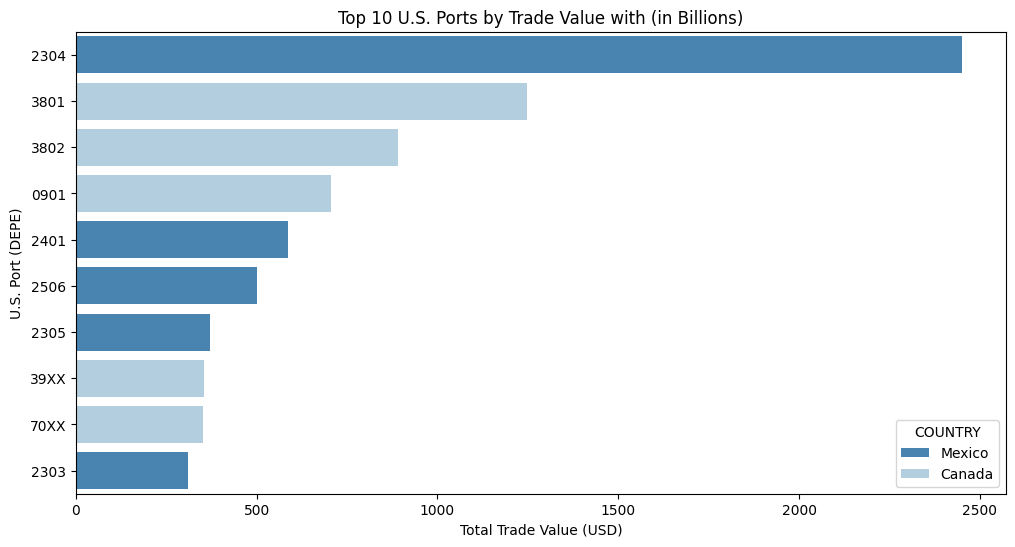

In [49]:
# Group by DEPE (Port) and sum trade values
port_values = final_data.groupby(['DEPE', 'COUNTRY'])['VALUE'].sum().reset_index()

# Convert trade values to billions
port_values['VALUE'] = (port_values['VALUE'] / 1e9).round(2)

# Sort ports by total trade value in descending order
port_values = port_values.sort_values(by = 'VALUE', ascending = False)

# Display top 10 ports by value
print(port_values.head(10))  

# Plot top 10 ports with the highest trade value
plt.figure(figsize = (12, 6))
sns.barplot(y = port_values['DEPE'][:10],  hue = port_values['COUNTRY'][:10], x = port_values['VALUE'][:10], palette = 'Blues_r')
plt.xlabel('Total Trade Value (USD)')
plt.ylabel('U.S. Port (DEPE)')
plt.title('Top 10 U.S. Ports by Trade Value with (in Billions)')
plt.show()

- **LAREDO** have the highest trade value of over **\$2,449 billion** followed by **DETROIT** with over **\$1,246 billion.**

- ### Top US States by Trade Value (in Billion USD)

        USASTATE    VALUE
43         Texas  2815.63
22      Michigan  1251.46
4     California  1151.41
13      Illinois   920.04
35          Ohio   478.13
44       Unknown   423.91
32      New York   394.83
38  Pennsylvania   336.93
14       Indiana   321.45
48    Washington   287.91


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

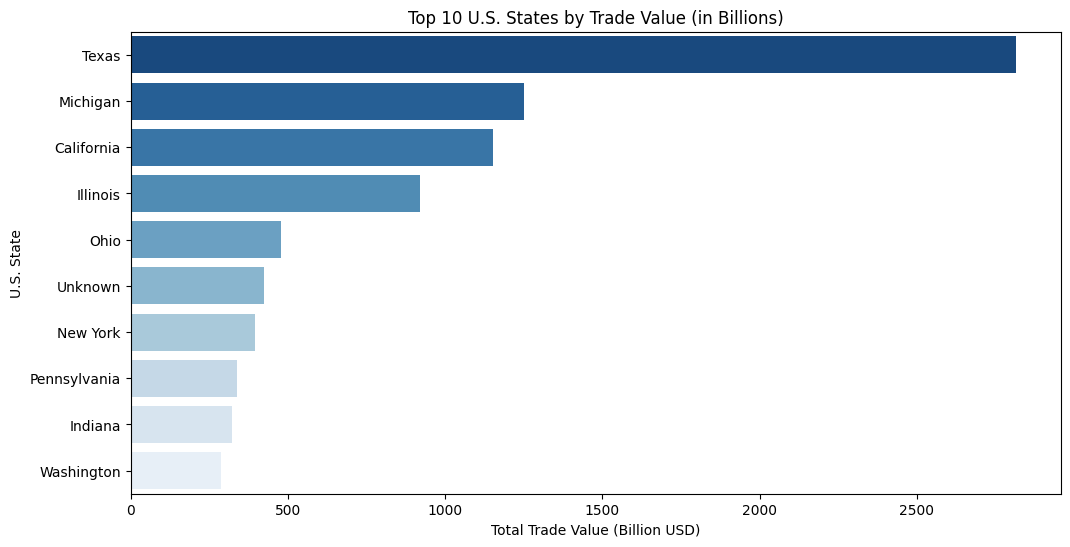

In [50]:
state_values = final_data.groupby('USASTATE')["VALUE"].sum().reset_index()
state_values['VALUE'] = (state_values['VALUE'] / 1_000_000_000).round(2)
top_10_states = state_values.sort_values(by = 'VALUE', ascending = False).head(10)

print(top_10_states)

plt.figure(figsize = (12, 6))
sns.barplot(y = top_10_states['USASTATE'], hue = top_10_states['USASTATE'], x = top_10_states['VALUE'], palette = 'Blues_r')
plt.xlabel('Total Trade Value (Billion USD)')
plt.ylabel('U.S. State')
plt.title('Top 10 U.S. States by Trade Value (in Billions)')
plt.show()

- ### U.S. States with the Highest Trade Value with Canada and Mexico


Top 10 U.S. States with the Highest Trade Value in Billion USD with Canada & Mexico:

      USASTATE COUNTRY    VALUE
87       Texas  Mexico  2258.38
9   California  Mexico   790.38
26    Illinois  Canada   672.22
45    Michigan  Mexico   652.33
44    Michigan  Canada   599.14
86       Texas  Canada   557.24
8   California  Canada   361.03
64    New York  Canada   336.99
70        Ohio  Canada   317.57
88     Unknown  Canada   307.95


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

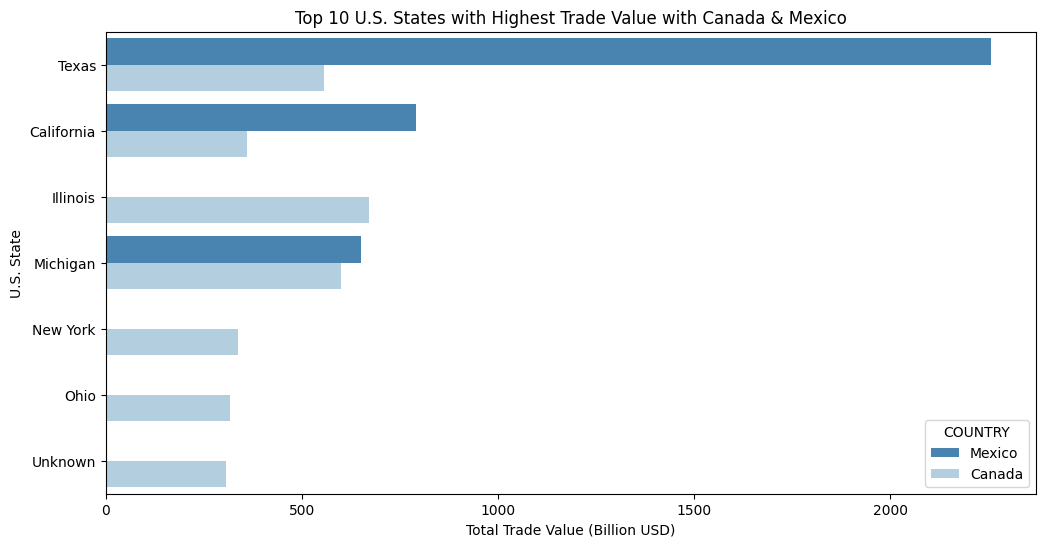

In [51]:
trade_by_state_country = final_data.groupby(['USASTATE', 'COUNTRY'])['VALUE'].sum().reset_index()
trade_by_state_country['VALUE'] = (trade_by_state_country['VALUE'] / 1e9).round(2)

trade_by_state_country = trade_by_state_country.sort_values(by='VALUE', ascending=False).head(10)

print('\nTop 10 U.S. States with the Highest Trade Value in Billion USD with Canada & Mexico:\n')
print(trade_by_state_country)

plt.figure(figsize = (12, 6))
sns.barplot(y = trade_by_state_country['USASTATE'], hue = trade_by_state_country['COUNTRY'], x = trade_by_state_country['VALUE'], palette = 'Blues_r')
plt.xlabel('Total Trade Value (Billion USD)')
plt.ylabel('U.S. State')
plt.title('Top 10 U.S. States with Highest Trade Value with Canada & Mexico')
plt.show()

- **Texas** contribute a higher trade value to the U.S with over **\$2,815 billion** followed by **Michigan** and **California** with over **\$1,251** and **\$1,151 billion** respectively.
- Further investigation indicated that, out of this, **Mexico** contributes over **\$2,258 billion** to **Texas**, **\$790 billion** to **California**, **\$652 billion** to **Michigan** while **Canada** contribute over **\$557 billion** to **Texas,** **\$361 billion** to **California** and **\$599 billion** to **Michigan**.

- ### Trade Contribution by Country (in Billion USD)

  COUNTRY    VALUE  PERCENTAGE
0  Canada  9494.02       49.45
1  Mexico  9704.38       50.55


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

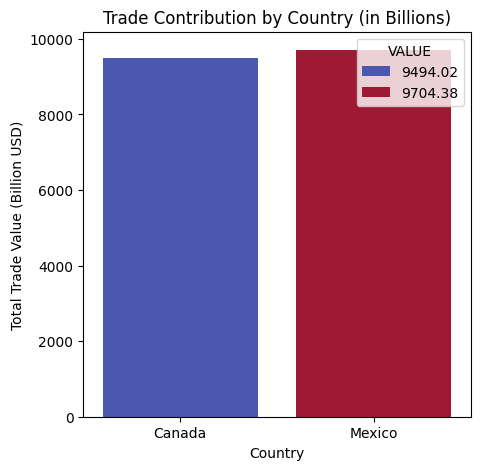

In [52]:
country_values = final_data.groupby('COUNTRY')['VALUE'].sum().reset_index()
country_values['VALUE'] = (country_values['VALUE'] / 1_000_000_000).round(2)

# Percentage contribution
total_trade = country_values['VALUE'].sum()
country_values['PERCENTAGE'] = ((country_values['VALUE'] / total_trade) * 100).round(2)

print(country_values)

plt.figure(figsize = (5, 5))
sns.barplot(x = country_values['COUNTRY'], y = country_values['VALUE'], hue = country_values['VALUE'], palette = 'coolwarm')
plt.xlabel('Country')
plt.ylabel('Total Trade Value (Billion USD)')
plt.title('Trade Contribution by Country (in Billions)')
plt.show()

- ### Export vs. Import Value (in Billion USD)

  COUNTRY TRDTYPE    VALUE
0  Canada  Export  4362.05
1  Canada  Import  5131.97
2  Mexico  Export  3965.21
3  Mexico  Import  5739.17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

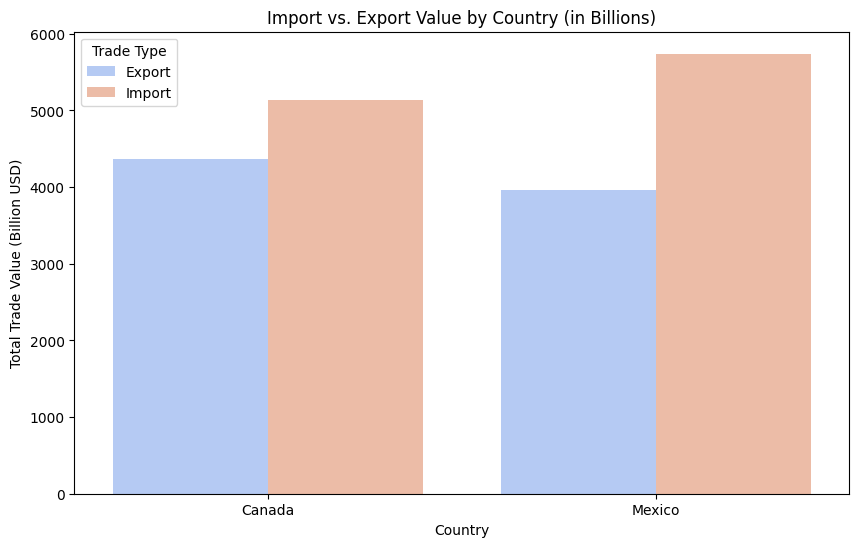

In [53]:
trade_by_type = final_data.groupby(['COUNTRY', 'TRDTYPE'])['VALUE'].sum().reset_index()
trade_by_type['VALUE'] = (trade_by_type['VALUE'] / 1_000_000_000).round(2)

print(trade_by_type)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'COUNTRY', y = 'VALUE', hue = 'TRDTYPE', data = trade_by_type, palette = 'coolwarm')
plt.xlabel('Country')
plt.ylabel('Total Trade Value (Billion USD)')
plt.title('Import vs. Export Value by Country (in Billions)')
plt.legend(title = 'Trade Type')
plt.show()

  TRDTYPE     VALUE
0  Export   8327.26
1  Import  10871.15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

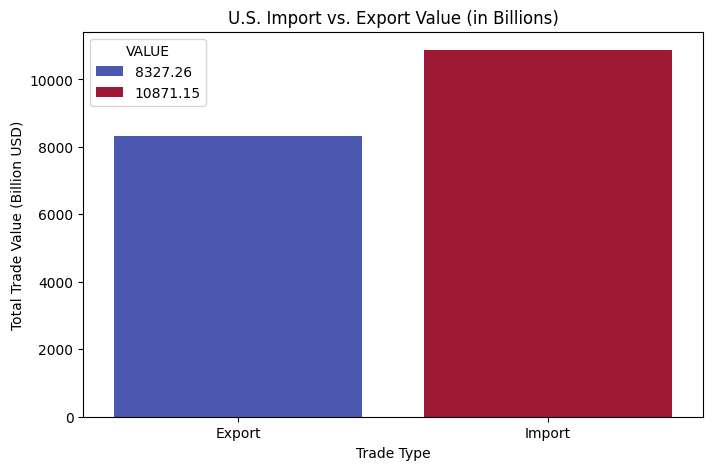

In [54]:
trade_by_type = final_data.groupby('TRDTYPE')['VALUE'].sum().reset_index()
trade_by_type['VALUE'] = (trade_by_type['VALUE'] / 1_000_000_000).round(2)

print(trade_by_type)

plt.figure(figsize = (8, 5))
sns.barplot(x = trade_by_type['TRDTYPE'], y = trade_by_type['VALUE'], hue = trade_by_type['VALUE'], palette = 'coolwarm')
plt.xlabel('Trade Type')
plt.ylabel('Total Trade Value (Billion USD)')
plt.title('U.S. Import vs. Export Value (in Billions)')
plt.show()

- ### Trade Value by Mode of Transport (in Billion USD)

                     DISAGMOT     VALUE
6                       Truck  12090.97
5                        Rail   2583.13
7                      Vessel   1499.68
4                    Pipeline   1432.91
3                       Other    761.30
0                         Air    722.70
1  Foreign Trade Zones (FTZs)    107.36
2  Mail (U.S. Postal Service)      0.36


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

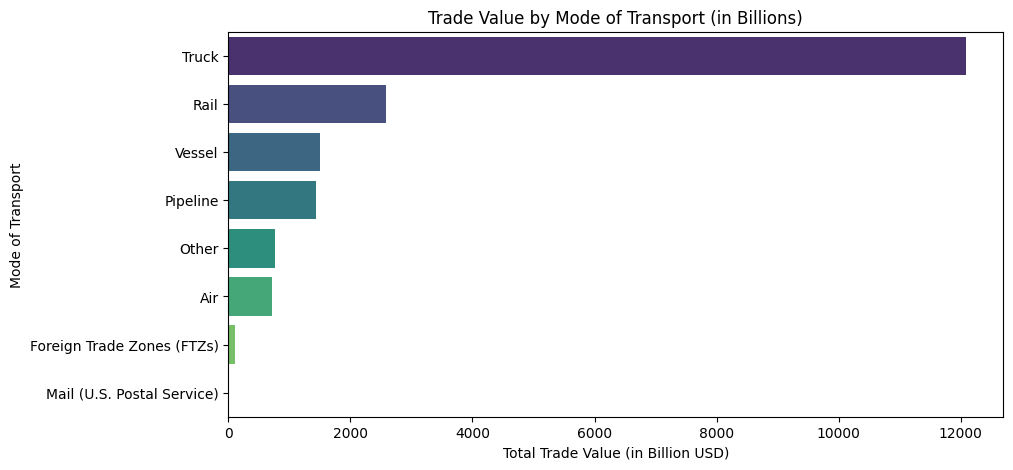

In [55]:
transport_values = final_data.groupby('DISAGMOT')['VALUE'].sum().reset_index()
transport_values['VALUE'] = (transport_values['VALUE'] / 1e9).round(2)
transport_values = transport_values.sort_values(by = 'VALUE', ascending = False)

print(transport_values)

plt.figure(figsize = (10, 5))
sns.barplot(y = transport_values['DISAGMOT'], hue = transport_values['DISAGMOT'], x = transport_values['VALUE'], palette = 'viridis')
plt.xlabel('Total Trade Value (in Billion USD)')
plt.ylabel('Mode of Transport')
plt.title('Trade Value by Mode of Transport (in Billions)')
plt.show()

- ### Frequently Used Mode of Transportation

In [56]:
# Count occurrences of each transport mode
transport_frequency = final_data['DISAGMOT'].value_counts().reset_index()

transport_frequency.columns = ['Transport Mode', 'Count']

transport_frequency['Percentage'] = ((transport_frequency['Count'] / transport_frequency['Count'].sum()) * 100).round(2)

print(transport_frequency)

               Transport Mode    Count  Percentage
0                       Truck  4270486       65.53
1                         Air  1120344       17.19
2                        Rail   661042       10.14
3                       Other   227962        3.50
4                      Vessel   192086        2.95
5  Foreign Trade Zones (FTZs)    24501        0.38
6                    Pipeline    13224        0.20
7  Mail (U.S. Postal Service)     7580        0.12


- ### Top Commodity by Trade Value (in Billion USD)

                                           COMMODITY2    VALUE
92  Vehicles, other than railway or tramway rollin...  2027.11
46  Mineral fuels, mineral oils and products; Mine...  1825.76
54               Nuclear reactors, boilers, machinery  1759.61
24       Electrical machinery and equipment and parts  1414.44
65                      Plastics and articles thereof   504.25
82                  Special classification provisions   410.98
56             Optical, photographic, cinematographic   373.15
8                           Articles of iron or steel   227.95
52  Natural or cultured pearls, precious or semipr...   214.23
30    Furniture; Bedding, mattress supports, cushions   213.81


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

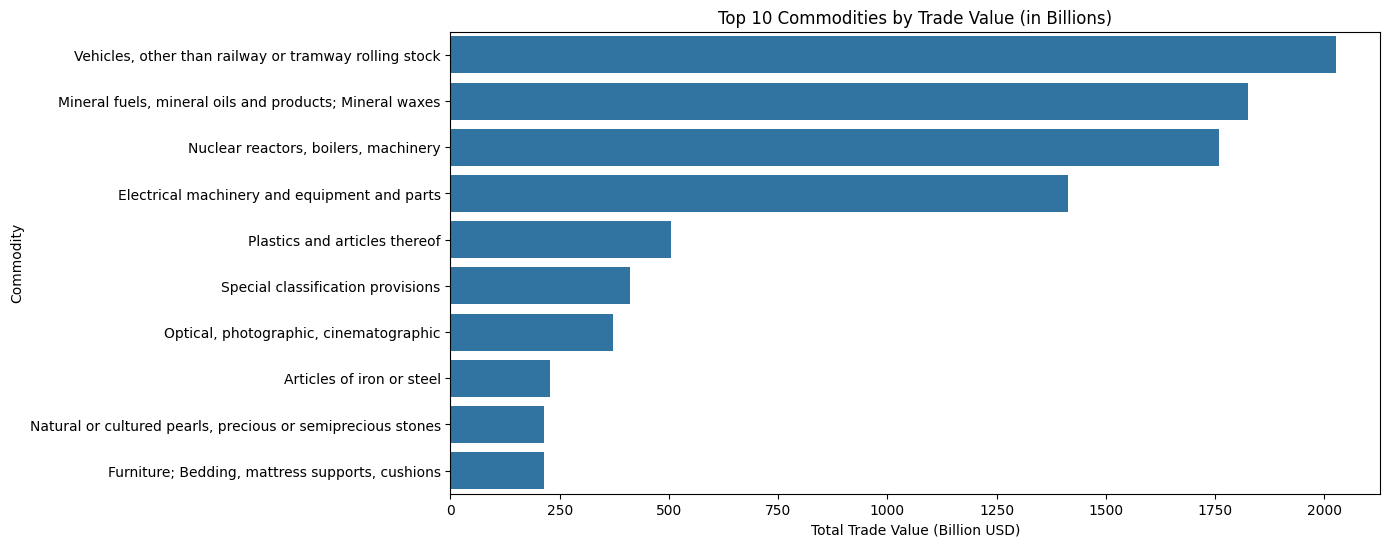

In [57]:
commodity_values = final_data.groupby('COMMODITY2')['VALUE'].sum().reset_index()
commodity_values = commodity_values.dropna()
commodity_values['VALUE'] = (commodity_values['VALUE'] / 1_000_000_000).round(2)
top_10_commodity = commodity_values.sort_values(by = 'VALUE', ascending = False).head(10)

print(top_10_commodity)

plt.figure(figsize = (12, 6))
sns.barplot(y = top_10_commodity['COMMODITY2'], x = top_10_commodity['VALUE'], errorbar = None)
plt.xlabel('Total Trade Value (Billion USD)')
plt.ylabel('Commodity')
plt.title('Top 10 Commodities by Trade Value (in Billions)')
plt.show()

- ### Top Commodities at Port

       DEPE                                         COMMODITY2   VALUE
4135   2304  Vehicles, other than railway or tramway rollin...  290.48
4097   2304               Nuclear reactors, boilers, machinery  238.95
11416  3801  Vehicles, other than railway or tramway rollin...  202.98
12274  39XX  Mineral fuels, mineral oils and products; Mine...  171.68
4067   2304       Electrical machinery and equipment and parts  171.62
4623   2401               Nuclear reactors, boilers, machinery   95.92
11378  3801               Nuclear reactors, boilers, machinery   95.10
13830  70XX                  Special classification provisions   94.75
5058   2408               Nuclear reactors, boilers, machinery   87.00
11513  3802  Vehicles, other than railway or tramway rollin...   82.24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

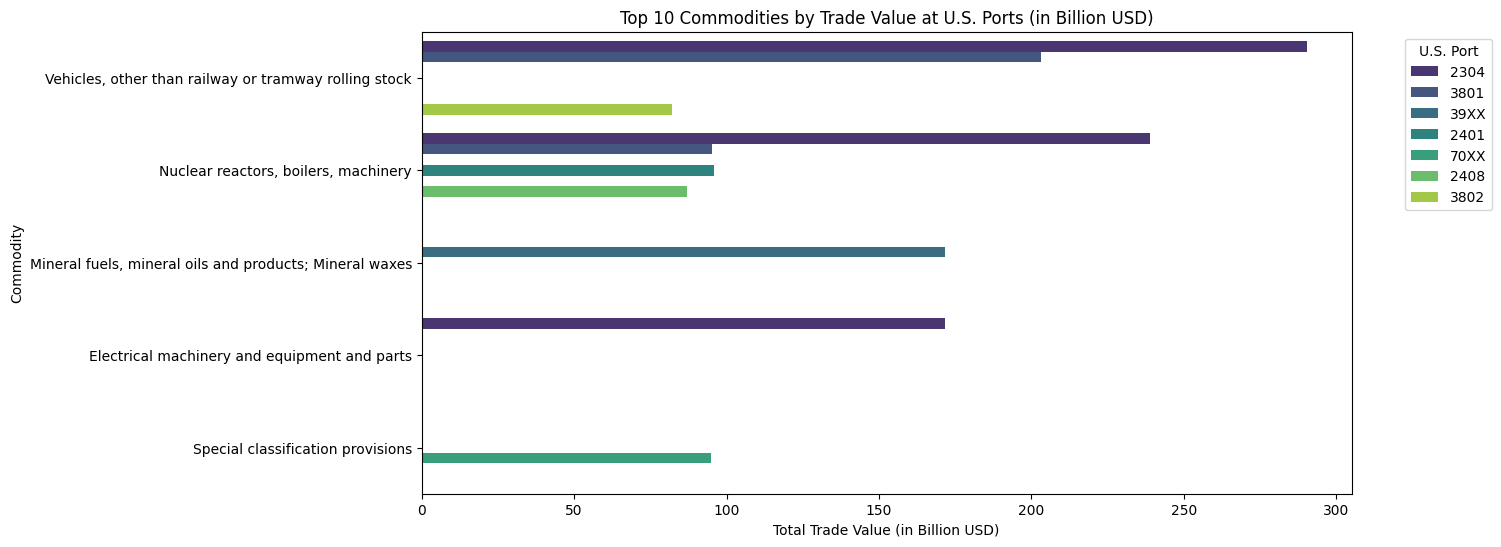

In [58]:
port_commodity_values = final_data.groupby(['DEPE', 'COMMODITY2'])['VALUE'].sum().reset_index()
port_commodity_values['VALUE'] = (port_commodity_values['VALUE'] / 1_000_000_000).round(2) 
top_10_port_commodities = port_commodity_values.sort_values(by = 'VALUE', ascending = False).head(10)

print(top_10_port_commodities)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'VALUE', y = 'COMMODITY2', hue = 'DEPE', data = top_10_port_commodities, palette = 'viridis')
plt.xlabel('Total Trade Value (in Billion USD)')
plt.ylabel('Commodity')
plt.title('Top 10 Commodities by Trade Value at U.S. Ports (in Billion USD)')
plt.legend(title = 'U.S. Port', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

     DISAGMOT                                         COMMODITY2    VALUE
495     Truck               Nuclear reactors, boilers, machinery  1547.87
465     Truck       Electrical machinery and equipment and parts  1248.25
533     Truck  Vehicles, other than railway or tramway rollin...  1085.51
340  Pipeline  Mineral fuels, mineral oils and products; Mine...   947.94
436      Rail  Vehicles, other than railway or tramway rollin...   724.83
584    Vessel  Mineral fuels, mineral oils and products; Mine...   605.37
506     Truck                      Plastics and articles thereof   383.88
497     Truck             Optical, photographic, cinematographic   305.24
523     Truck                  Special classification provisions   233.90
449     Truck                          Articles of iron or steel   196.70


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

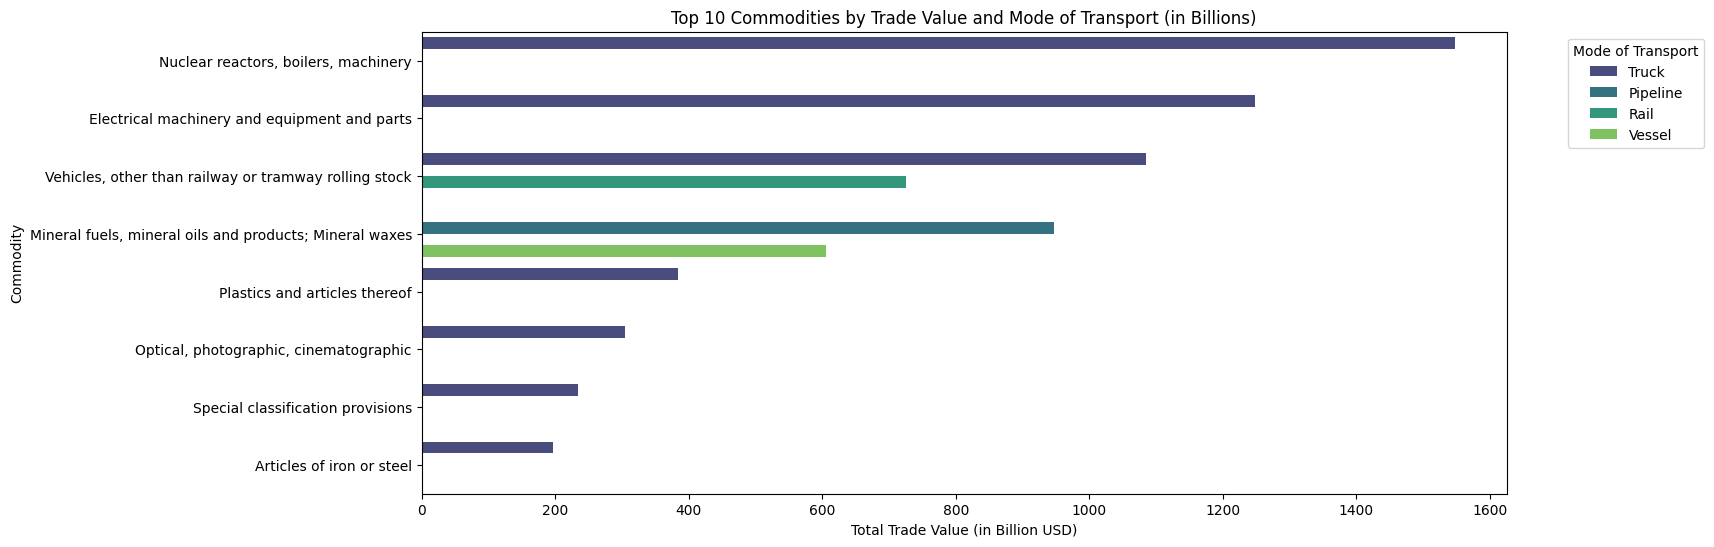

In [59]:
transport_commodity_values = final_data.groupby(['DISAGMOT', 'COMMODITY2'])['VALUE'].sum().reset_index()
transport_commodity_values['VALUE'] = (transport_commodity_values['VALUE'] / 1_000_000_000).round(2) 
transport_commodity_values = transport_commodity_values.sort_values(by = 'VALUE', ascending = False).head(10)

print(transport_commodity_values)

plt.figure(figsize=(14, 6))
sns.barplot(x = 'VALUE', y = 'COMMODITY2', hue = 'DISAGMOT', data = transport_commodity_values, palette = 'viridis')
plt.xlabel('Total Trade Value (in Billion USD)')
plt.ylabel('Commodity')
plt.title('Top 10 Commodities by Trade Value and Mode of Transport (in Billions)')
plt.legend(title = 'Mode of Transport', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

     DISAGMOT                                         COMMODITY2   SHIPWT
340  Pipeline  Mineral fuels, mineral oils and products; Mine...  1570.12
584    Vessel  Mineral fuels, mineral oils and products; Mine...  1089.67
616    Vessel  Salt; Sulfur; Earths and stone; Plastering mat...   280.35
390      Rail  Mineral fuels, mineral oils and products; Mine...   161.51
371      Rail                                        Fertilizers   103.15
438      Rail           Wood and articles of wood; Wood charcoal    94.91
533     Truck  Vehicles, other than railway or tramway rollin...    91.44
519     Truck  Salt; Sulfur; Earths and stone; Plastering mat...    88.29
464     Truck     Edible vegetables and certain roots and tubers    81.20
595    Vessel                                 Ores, slag and ash    75.77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

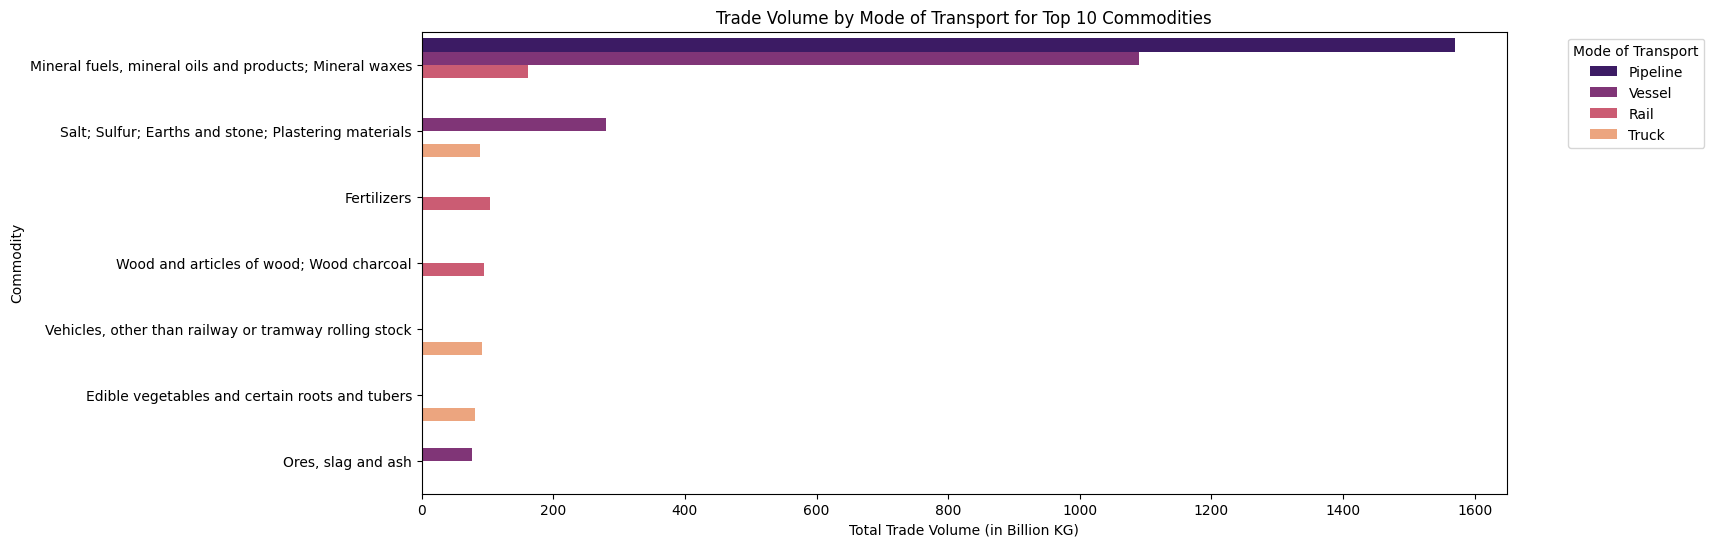

In [60]:
transport_commodity_volume = final_data.groupby(['DISAGMOT', 'COMMODITY2'])['SHIPWT'].sum().reset_index()
transport_commodity_volume['SHIPWT'] = (transport_commodity_volume['SHIPWT'] / 1_000_000_000).round(2)
transport_commodity_volume = transport_commodity_volume.sort_values(by = 'SHIPWT', ascending = False).head(10)

print(transport_commodity_volume)

plt.figure(figsize=(14, 6))
sns.barplot(x = 'SHIPWT', y = 'COMMODITY2', hue = 'DISAGMOT', data = transport_commodity_volume, palette = 'magma')
plt.xlabel('Total Trade Volume (in Billion KG)')
plt.ylabel('Commodity')
plt.title('Trade Volume by Mode of Transport for Top 10 Commodities')
plt.legend(title = 'Mode of Transport', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

- ### Trade Value by Mode of Transport (US - Canada)

In [61]:
# Filter only US-Canada trade
us_canada_trade = final_data[final_data['COUNTRY'] == 'Canada']

                     DISAGMOT    VALUE
6                       Truck  5259.50
5                        Rail  1408.01
4                    Pipeline  1307.80
3                       Other   563.41
0                         Air   466.40
7                      Vessel   456.38
1  Foreign Trade Zones (FTZs)    32.19
2  Mail (U.S. Postal Service)     0.33


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

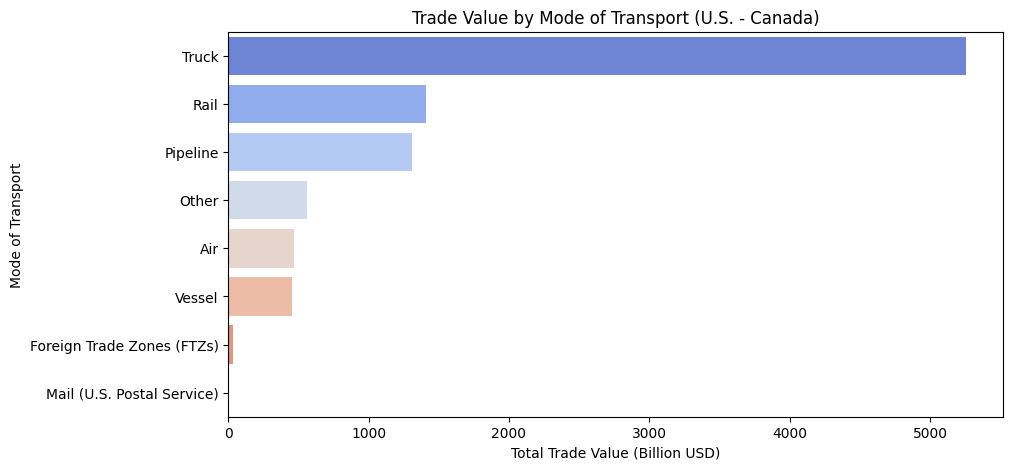

In [62]:
transport_values = us_canada_trade.groupby('DISAGMOT')['VALUE'].sum().reset_index()
transport_values['VALUE'] = (transport_values['VALUE'] / 1_000_000_000).round(2)

transport_values = transport_values.sort_values(by = 'VALUE', ascending=False)
print(transport_values)

plt.figure(figsize = (10, 5))
sns.barplot(x = 'VALUE', y = 'DISAGMOT', hue = 'DISAGMOT', data = transport_values, palette = 'coolwarm')
plt.xlabel('Total Trade Value (Billion USD)')
plt.ylabel('Mode of Transport')
plt.title('Trade Value by Mode of Transport (U.S. - Canada)')
plt.show()

- ### Trade Value by Canadian Province

                  CANPROV    VALUE
8                 Ontario  3098.41
0                 Alberta  1167.09
11                 Quebec   786.55
1        British Columbia   397.29
2                Manitoba   259.18
10       Province Unknown   239.53
12           Saskatchewan   180.28
3           New Brunswick   156.49
4            Newfoundland    43.31
6             Nova Scotia    32.25
9    Prince Edward Island    10.67
13        Yukon Territory     1.36
5   Northwest Territories     0.32
7                 Nunavut     0.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

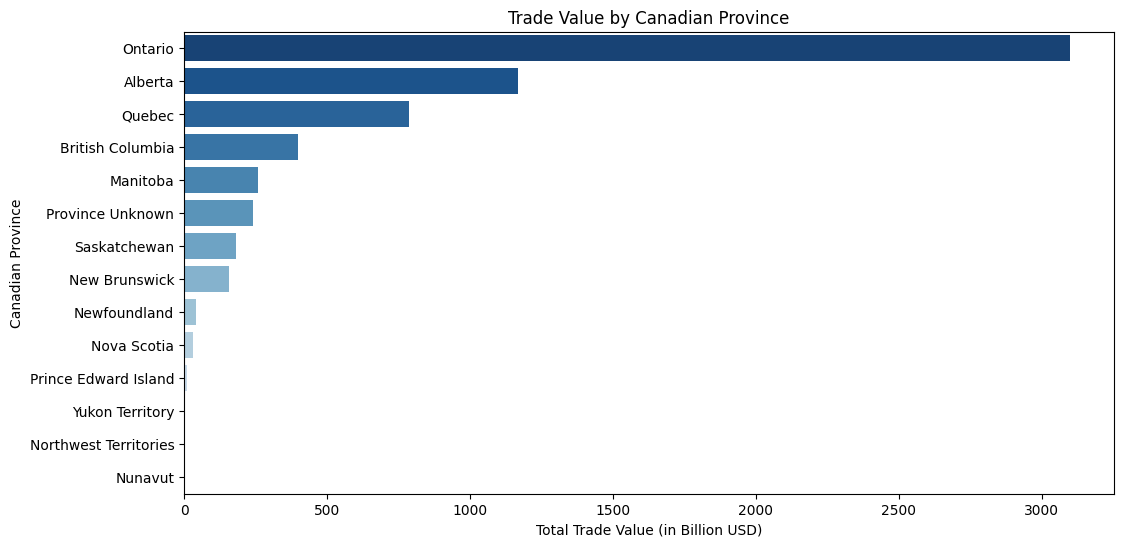

In [63]:
province_values = us_canada_trade.groupby('CANPROV')['VALUE'].sum().reset_index()
province_values['VALUE'] = (province_values['VALUE'] / 1_000_000_000).round(2)

province_values = province_values.sort_values(by = 'VALUE', ascending = False)
print(province_values)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'VALUE', y = 'CANPROV', hue = 'CANPROV', data = province_values, palette = 'Blues_r')
plt.xlabel('Total Trade Value (in Billion USD)')
plt.ylabel('Canadian Province')
plt.title('Trade Value by Canadian Province')
plt.show()

- ### Trade Value by Commodity

                                           COMMODITY2    VALUE
46  Mineral fuels, mineral oils and products; Mine...  1275.68
92  Vehicles, other than railway or tramway rollin...   847.91
54               Nuclear reactors, boilers, machinery   660.93
24       Electrical machinery and equipment and parts   309.82
82                  Special classification provisions   266.82
65                      Plastics and articles thereof   261.17
52  Natural or cultured pearls, precious or semipr...   158.00
94           Wood and articles of wood; Wood charcoal   145.79
1             Aircraft, spacecraft, and parts thereof   129.33
3                       Aluminum and articles thereof   124.78


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

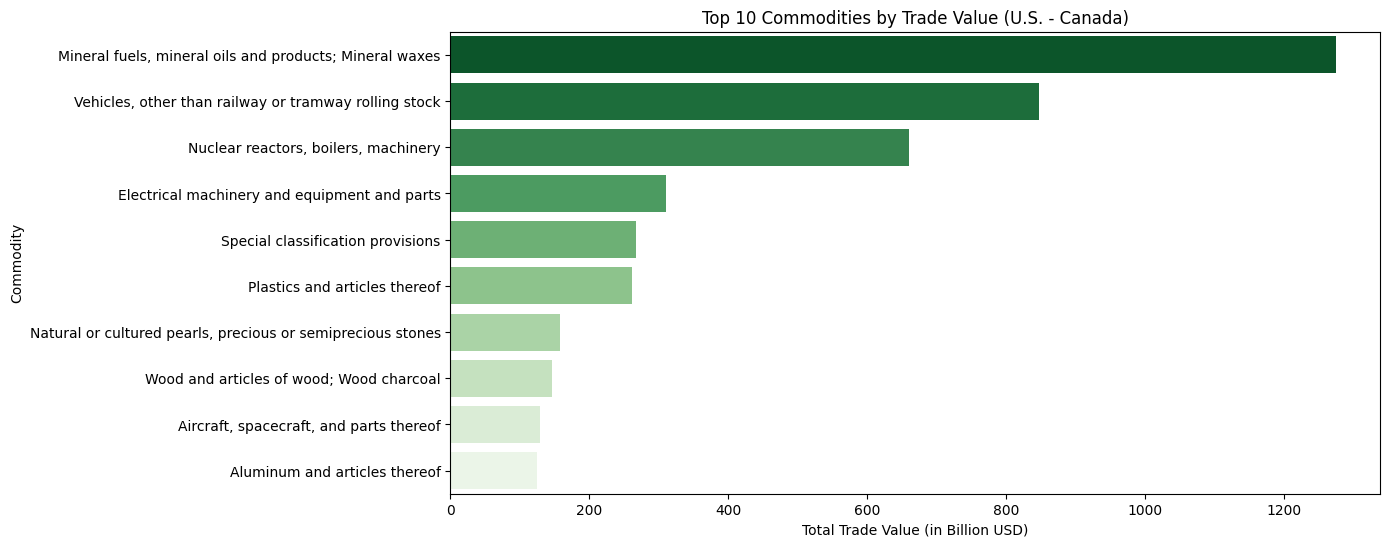

In [64]:
commodity_values = us_canada_trade.groupby('COMMODITY2')['VALUE'].sum().reset_index()
commodity_values['VALUE'] = (commodity_values['VALUE'] / 1e9).round(2)

top_10_commodities = commodity_values.sort_values(by = 'VALUE', ascending = False).head(10)

print(top_10_commodities)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'VALUE', y = 'COMMODITY2', hue = 'COMMODITY2', data = top_10_commodities, palette = 'Greens_r')
plt.xlabel('Total Trade Value (in Billion USD)')
plt.ylabel('Commodity')
plt.title('Top 10 Commodities by Trade Value (U.S. - Canada)')
plt.show()

- ### Trade Value by Mode of Transport (US - Mexico)

In [65]:
# Filter only U.S.-Canada trade
us_mexico_trade = final_data[final_data['COUNTRY'] == 'Mexico']

                     DISAGMOT    VALUE
6                       Truck  6831.47
5                        Rail  1175.12
7                      Vessel  1043.30
0                         Air   256.29
3                       Other   197.89
4                    Pipeline   125.11
1  Foreign Trade Zones (FTZs)    75.16
2  Mail (U.S. Postal Service)     0.03


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

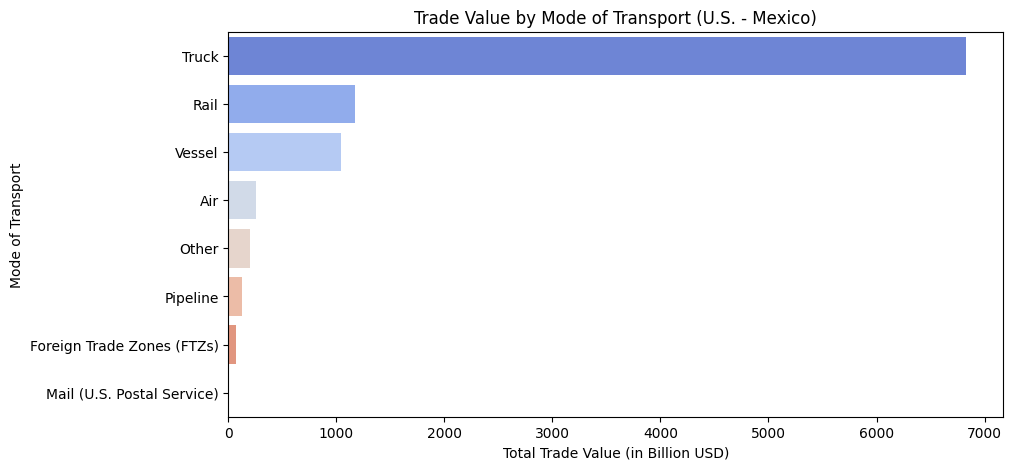

In [66]:
transport_values = us_mexico_trade.groupby('DISAGMOT')['VALUE'].sum().reset_index()
transport_values['VALUE'] = (transport_values['VALUE'] / 1e9).round(2)

transport_values = transport_values.sort_values(by = 'VALUE', ascending = False)
print(transport_values)

plt.figure(figsize = (10, 5))
sns.barplot(x = 'VALUE', y = 'DISAGMOT', hue = 'DISAGMOT', data = transport_values, palette = 'coolwarm')
plt.xlabel('Total Trade Value (in Billion USD)')
plt.ylabel('Mode of Transport')
plt.title('Trade Value by Mode of Transport (U.S. - Mexico)')
plt.show()

- ### Trade Value by Mexican States

            MEXSTATE   VALUE
25     State Unknown  594.69
5          Chihuahua  373.34
10  Estado de Mexico  285.92
17        Nuevo Leon  236.75
1    Baja California  231.27
8   Distrito Federal  202.44
27        Tamaulipas  144.10
6           Coahuila   96.25
14           Jalisca   82.49
24            Sonora   79.60


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

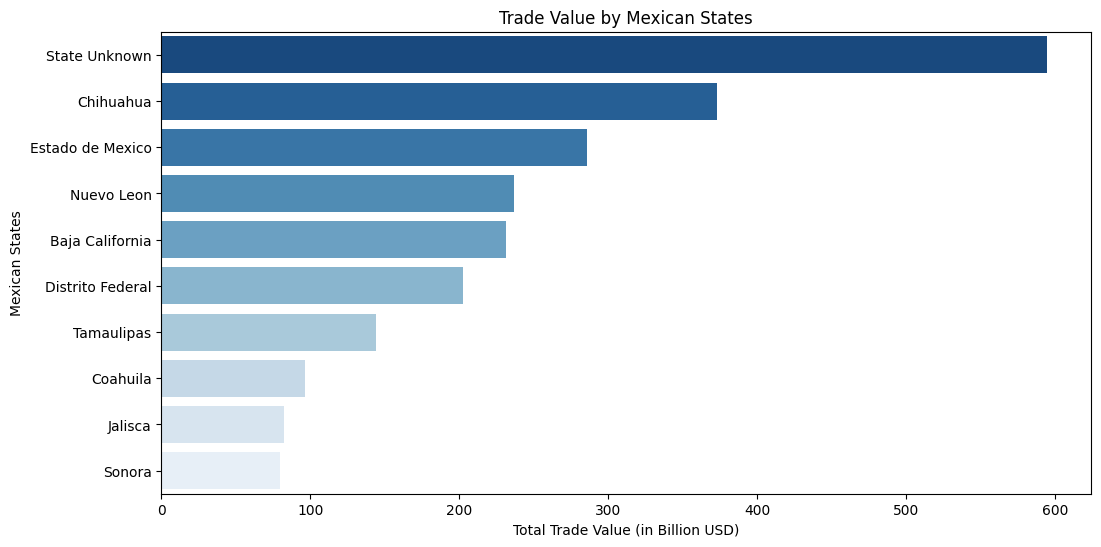

In [67]:
states_values = us_mexico_trade.groupby('MEXSTATE')['VALUE'].sum().reset_index()
states_values['VALUE'] = (states_values['VALUE'] / 1_000_000_000).round(2)
states_values = states_values.sort_values(by = 'VALUE', ascending = False).head(10)

print(states_values)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'VALUE', y = 'MEXSTATE', hue = 'MEXSTATE', data = states_values, palette = 'Blues_r')
plt.xlabel('Total Trade Value (in Billion USD)')
plt.ylabel('Mexican States')
plt.title('Trade Value by Mexican States')
plt.show()

- ### Trade Value by Commodity (US - Mexico)

                                           COMMODITY2    VALUE
92  Vehicles, other than railway or tramway rollin...  1179.21
24       Electrical machinery and equipment and parts  1104.62
54               Nuclear reactors, boilers, machinery  1098.68
46  Mineral fuels, mineral oils and products; Mine...   550.09
56             Optical, photographic, cinematographic   250.22
65                      Plastics and articles thereof   243.08
82                  Special classification provisions   144.16
30    Furniture; Bedding, mattress supports, cushions   122.83
8                           Articles of iron or steel   121.21
11                     Beverages, spirits and vinegar    98.74


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

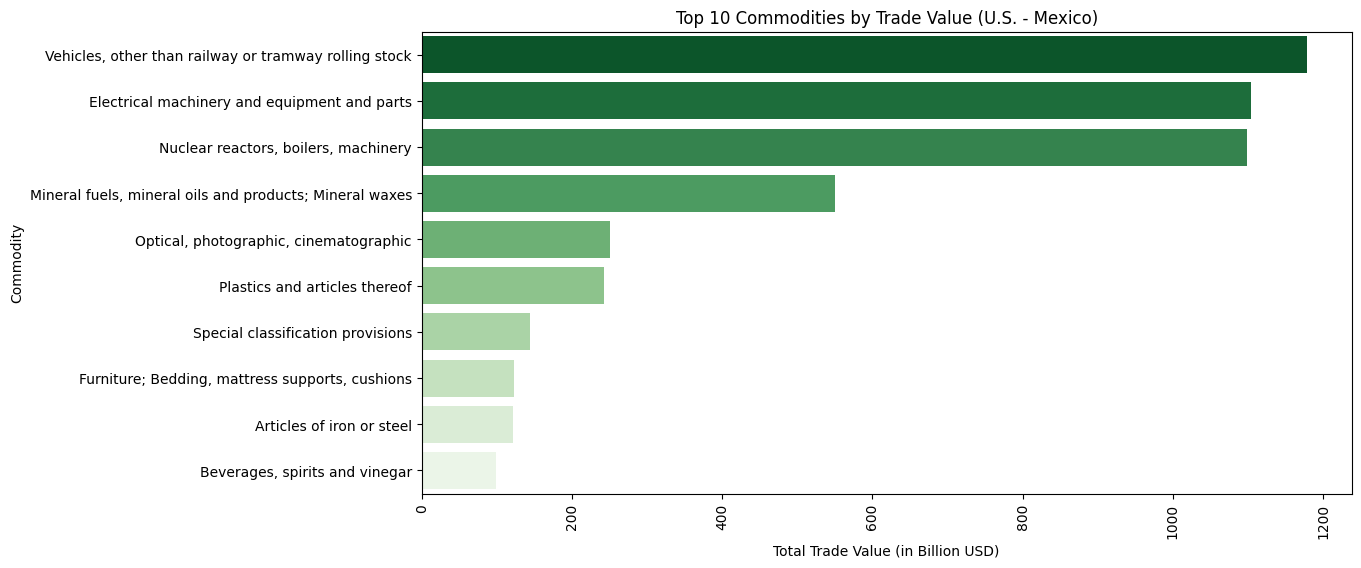

In [68]:
commodity_values = us_mexico_trade.groupby('COMMODITY2')['VALUE'].sum().reset_index()
commodity_values['VALUE'] = (commodity_values['VALUE'] / 1_000_000_000).round(2)

top_10_commodities = commodity_values.sort_values(by = 'VALUE', ascending=False).head(10)

print(top_10_commodities)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'VALUE', y = 'COMMODITY2', hue= 'COMMODITY2', data = top_10_commodities, palette = 'Greens_r')
plt.xlabel('Total Trade Value (in Billion USD)')
plt.ylabel('Commodity')
plt.title('Top 10 Commodities by Trade Value (U.S. - Mexico)')
plt.xticks(rotation = 90)
plt.show()

## Historical Trend Analysis

In [69]:
# Create a DATE column for time-series analysis
final_data['DATE'] = pd.to_datetime(final_data['YEAR'].astype(str) + "-" + final_data['MONTH'].astype(str).str.zfill(2), format="%Y-%m")

<IPython.core.display.Javascript object>

- ###  Total U.S. - North American Freight Flows Over Time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

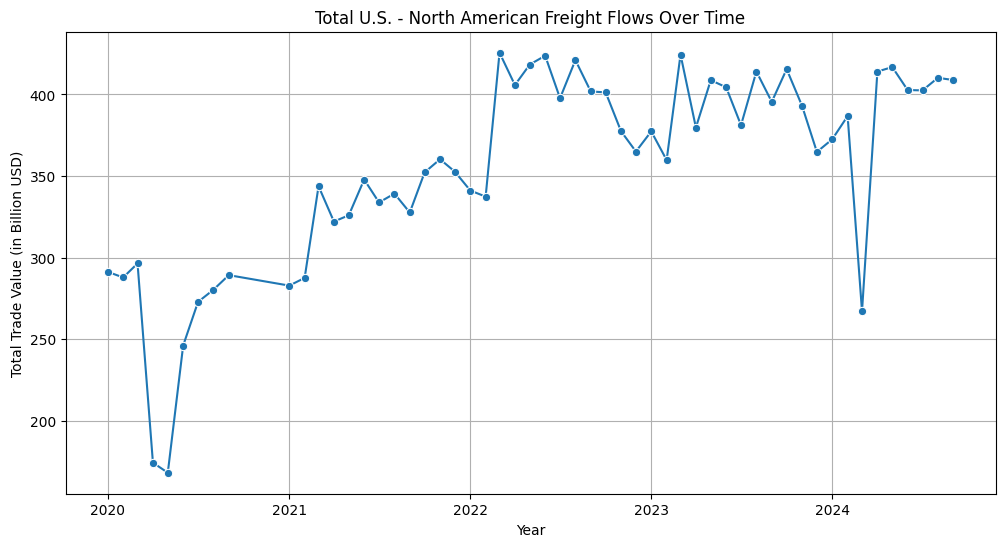

In [70]:
total_trends = final_data.groupby('DATE')['VALUE'].sum().reset_index()
total_trends['VALUE'] = total_trends['VALUE'] / 1e9

plt.figure(figsize=(12, 6))
sns.lineplot(x = 'DATE', y = 'VALUE', data = total_trends, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Total Trade Value (in Billion USD)')
plt.title('Total U.S. - North American Freight Flows Over Time')
plt.grid(True)
plt.show()

- ### U.S. Freight Flows with Canada vs. Mexico Over Time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

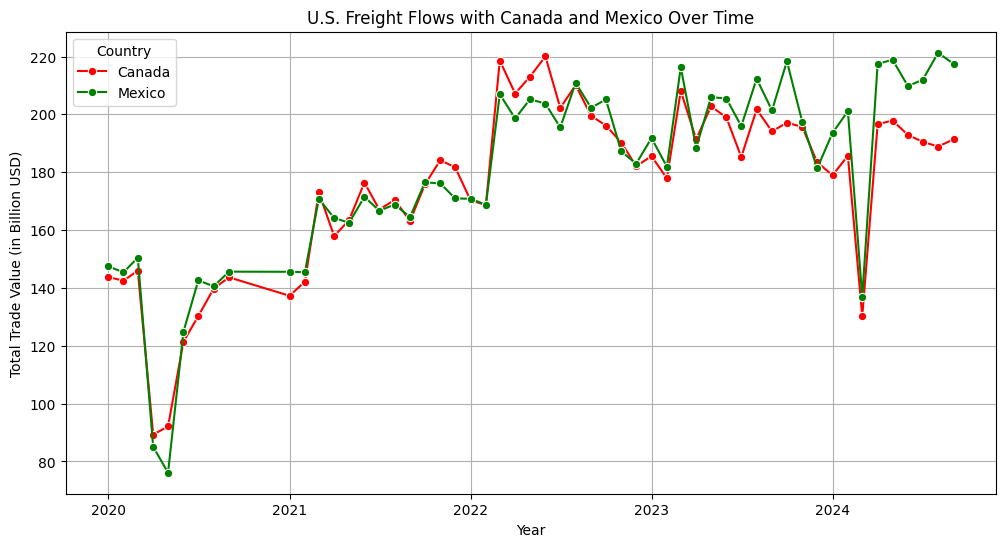

In [71]:
country_trends = final_data.groupby(['DATE', 'COUNTRY'])['VALUE'].sum().reset_index()
country_trends['VALUE'] = country_trends['VALUE'] / 1e9

plt.figure(figsize = (12, 6))
sns.lineplot(x = 'DATE', y = 'VALUE', hue = 'COUNTRY', data = country_trends, marker = 'o', palette = ['red', 'green'])
plt.xlabel('Year')
plt.ylabel('Total Trade Value (in Billion USD)')
plt.title('U.S. Freight Flows with Canada and Mexico Over Time')
plt.legend(title = 'Country')
plt.grid(True)
plt.show()

- ### U.S. - North American Freight Flows by Exports & Imports

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

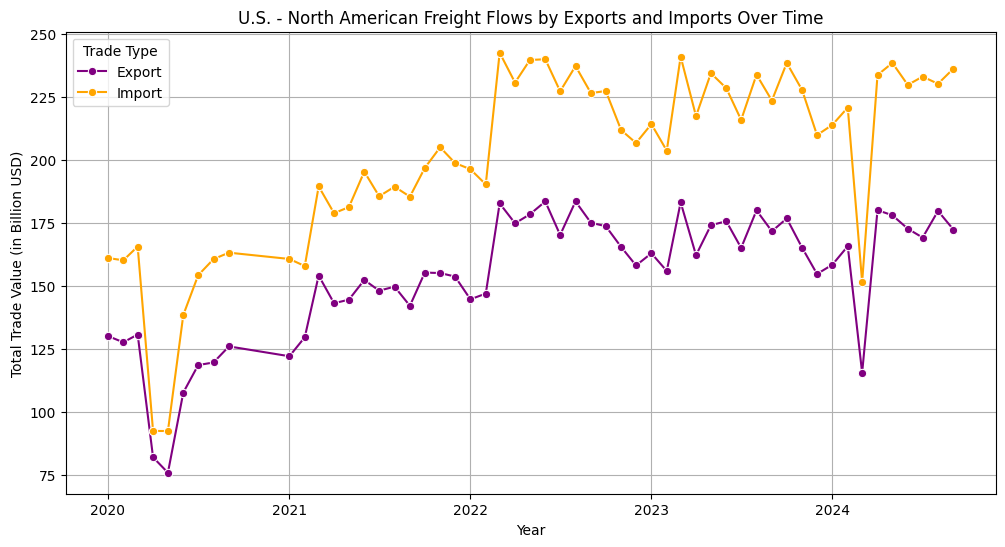

In [72]:
trade_type_trends = final_data.groupby(['DATE', 'TRDTYPE'])['VALUE'].sum().reset_index()
trade_type_trends['VALUE'] = trade_type_trends['VALUE'] / 1e9

plt.figure(figsize = (12, 6))
sns.lineplot(x = 'DATE', y = 'VALUE', hue = 'TRDTYPE', data = trade_type_trends, marker = 'o', palette = ['purple', 'orange'])
plt.xlabel('Year')
plt.ylabel('Total Trade Value (in Billion USD)')
plt.title('U.S. - North American Freight Flows by Exports and Imports Over Time')
plt.legend(title = 'Trade Type')
plt.grid(True)
plt.show()

- ### Freight Movement Trends by Mode of Transport

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

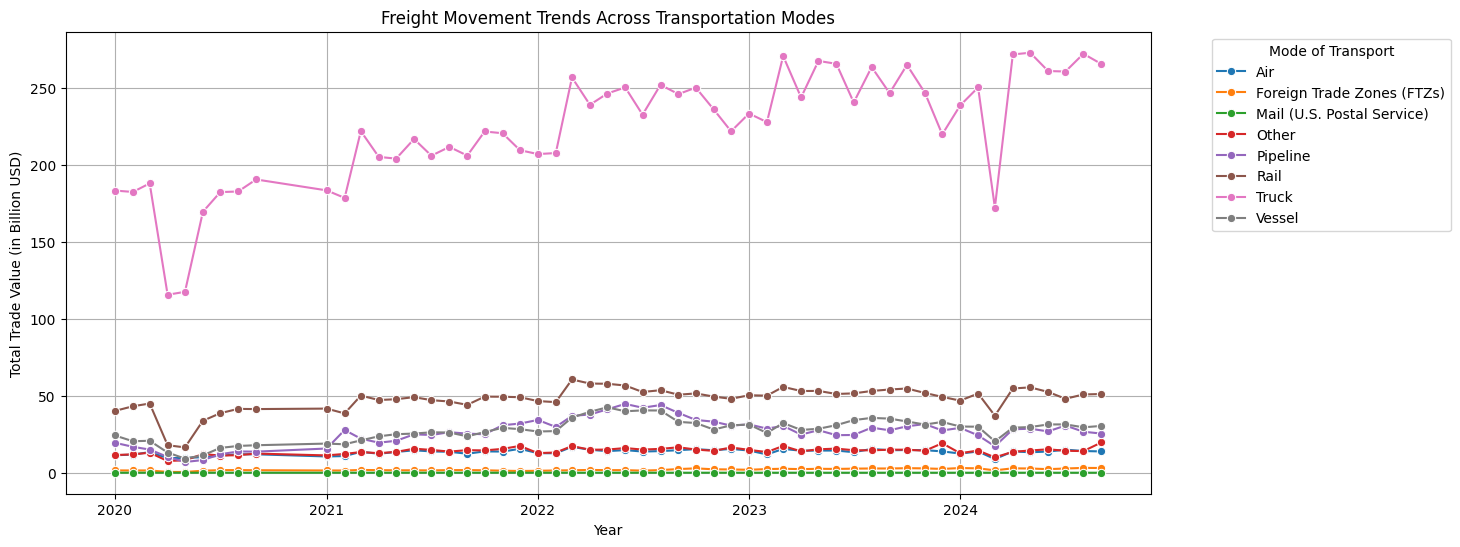

In [73]:
transport_trends = final_data.groupby(['DATE', 'DISAGMOT'])['VALUE'].sum().reset_index()
transport_trends['VALUE'] = transport_trends['VALUE'] / 1e9

plt.figure(figsize = (14, 6))
sns.lineplot(x = 'DATE', y = 'VALUE', hue = 'DISAGMOT', data = transport_trends, marker = 'o', palette = 'tab10')
plt.xlabel('Year')
plt.ylabel('Total Trade Value (in Billion USD)')
plt.title('Freight Movement Trends Across Transportation Modes')
plt.legend(title = 'Mode of Transport', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True)
plt.show()

- ### Contribution of Each Transport Mode Over Time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x600 with 0 Axes>

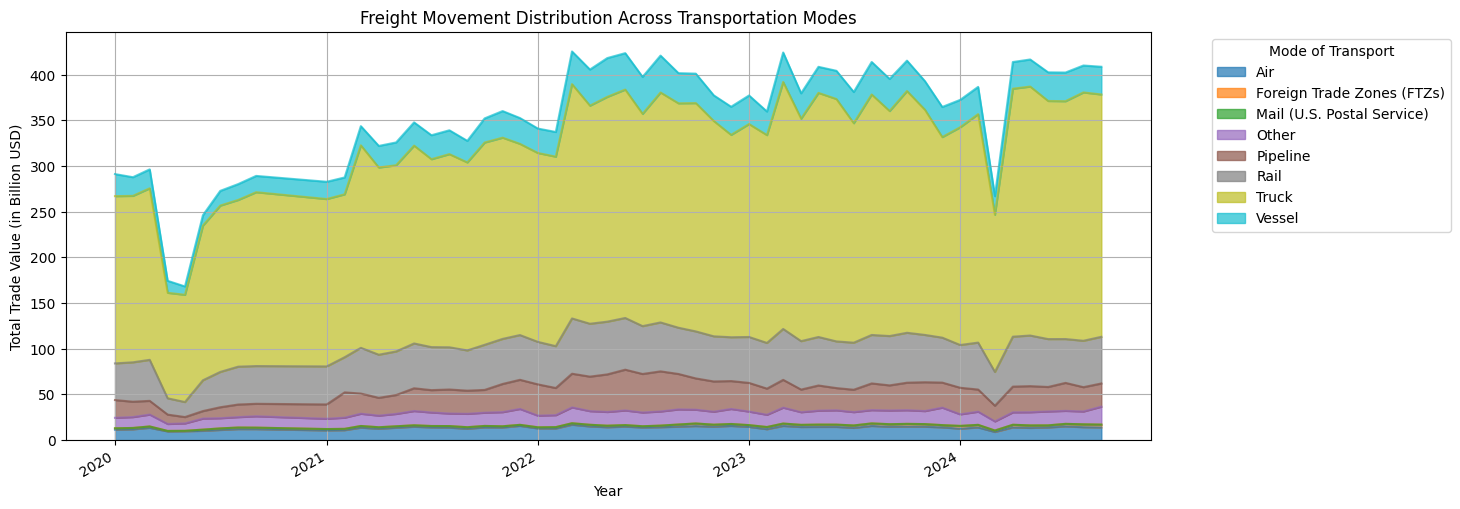

In [74]:
transport_trends = final_data.groupby(['DATE', 'DISAGMOT'])['VALUE'].sum().reset_index()
transport_trends['VALUE'] = transport_trends['VALUE'] / 1e9

plt.figure(figsize = (14, 6))
transport_pivot = transport_trends.pivot(index = 'DATE', columns = 'DISAGMOT', values = 'VALUE').fillna(0)
transport_pivot.plot(kind = 'area', stacked = True, colormap = 'tab10', alpha = 0.7, figsize = (14, 6))
plt.xlabel('Year')
plt.ylabel('Total Trade Value (in Billion USD)')
plt.title('Freight Movement Distribution Across Transportation Modes')
plt.legend(title = 'Mode of Transport', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True)
plt.show()

- ### Potential Inefficiencies in Freight Flow

In [75]:
# High Freight Cost per Unit Weight (Top 10)
final_data['Cost_per_Unit_Weight'] = final_data['FREIGHT_CHARGES'] / (final_data['SHIPWT'] + 1)  # Avoid division by zero
high_cost_shipments = final_data[final_data['Cost_per_Unit_Weight'] > final_data['Cost_per_Unit_Weight'].quantile(0.95)]
print('\nTop 10 High Freight Cost per Unit Weight:')
print(high_cost_shipments[['COUNTRY', 'SHIPWT', 'FREIGHT_CHARGES', 'Cost_per_Unit_Weight']].nlargest(10, 'Cost_per_Unit_Weight'))



# Empty or Low-Weight Shipments with High Costs (Top 10)
low_weight_high_cost = final_data[(final_data['SHIPWT'] == 0) & (final_data['FREIGHT_CHARGES'] > final_data['FREIGHT_CHARGES'].median())]
print('\nTop 20 Empty or Low-Weight Shipments with High Costs:')
print(low_weight_high_cost[['COUNTRY', 'SHIPWT', 'FREIGHT_CHARGES']].nlargest(20, 'FREIGHT_CHARGES'))



# Inefficient Transport Modes (Top 10)
inefficient_modes = final_data[(final_data['DISAGMOT'].isin(['Air', 'Truck'])) & (final_data['Cost_per_Unit_Weight'] > final_data['Cost_per_Unit_Weight'].median())]
print('\nTop 10 Inefficient Transport Modes:')
print(inefficient_modes[['DISAGMOT', 'SHIPWT', 'FREIGHT_CHARGES', 'Cost_per_Unit_Weight']].nlargest(10, 'Cost_per_Unit_Weight'))



# High-Cost Trade Routes (Top 10)
high_cost_routes = final_data.groupby(['COUNTRY', 'DISAGMOT'])['FREIGHT_CHARGES'].mean().reset_index()
high_cost_routes['FREIGHT_CHARGES'] = high_cost_routes['FREIGHT_CHARGES'] / 1e6
high_cost_routes = high_cost_routes.sort_values(by = 'FREIGHT_CHARGES', ascending = False)
print('\nTop 10 High-Cost Trade Routes (in Million USD):')
print(high_cost_routes.head(10))


Top 10 High Freight Cost per Unit Weight:
        COUNTRY  SHIPWT  FREIGHT_CHARGES  Cost_per_Unit_Weight
1123882  Canada       0        110442567           110442567.0
6304978  Canada       0        110442567           110442567.0
6305407  Canada       0         94235779            94235779.0
1123961  Canada       0         93293421            93293421.0
4578811  Canada       0         93293421            93293421.0
6043160  Canada       0         92168480            92168480.0
698247   Canada       0         91246795            91246795.0
3414863  Canada       0         91246795            91246795.0
6235320  Canada       0         87687630            87687630.0
1009680  Canada       0         86810754            86810754.0

Top 20 Empty or Low-Weight Shipments with High Costs:
        COUNTRY  SHIPWT  FREIGHT_CHARGES
1123882  Canada       0        110442567
6304978  Canada       0        110442567
6305407  Canada       0         94235779
1123961  Canada       0         93293421
4578

In [76]:
# Filter rows where SHIPWT is 0
zero_shipwt_data = final_data[final_data['SHIPWT'] == 0]

# Group by DISAGMOT and calculate the count of zero SHIPWT, total FREIGHT_CHARGES, and total VALUE
zero_shipwt_summary = (
    zero_shipwt_data
    .groupby('DISAGMOT')
    .agg(
        count_zero_shipwt = ('SHIPWT', 'count'),
        total_freight_charges = ('FREIGHT_CHARGES', 'sum'),
        total_value = ('VALUE', 'sum')
    )
    .reset_index()
)

zero_shipwt_summary['total_freight_charges'] = (zero_shipwt_summary['total_freight_charges'] / 1e9).round(2)
zero_shipwt_summary['total_value'] = (zero_shipwt_summary['total_value'] / 1e9).round(2)

zero_shipwt_summary = zero_shipwt_summary.sort_values(by = 'count_zero_shipwt', ascending = False)

print('\nNumber of 0 SHIPWT per Transport Mode, Total FREIGHT_CHARGES & VALUE (in Billion USD):')
print(zero_shipwt_summary)


Number of 0 SHIPWT per Transport Mode, Total FREIGHT_CHARGES & VALUE (in Billion USD):
                     DISAGMOT  count_zero_shipwt  total_freight_charges  \
6                       Truck            2974030                  57.61   
5                        Rail             350401                   9.50   
3                       Other             211500                   2.88   
4                    Pipeline               8313                  13.10   
2  Mail (U.S. Postal Service)               7489                   0.01   
0                         Air               1628                   0.00   
7                      Vessel                108                   0.00   
1  Foreign Trade Zones (FTZs)                 10                   0.00   

   total_value  
6      5484.76  
5       924.36  
3       697.86  
4       350.96  
2         0.36  
0         0.29  
7         0.48  
1         0.00  


- ### Congestion Analysis

In [77]:
# Identify Busiest Trade Routes
trade_route_congestion = final_data.groupby(['COUNTRY', 'DISAGMOT'])['SHIPWT'].sum().reset_index()
trade_route_congestion['SHIPWT'] = (trade_route_congestion['SHIPWT'] / 1e9).round(2)
trade_route_congestion = trade_route_congestion.sort_values(by = 'SHIPWT', ascending = False)

print('\nTop 10 Congested Trade Routes by SHIPWT (in Billion Kg):')
print(trade_route_congestion.head(10))


Top 10 Congested Trade Routes by SHIPWT (in Billion Kg):
   COUNTRY                    DISAGMOT   SHIPWT
4   Canada                    Pipeline  2372.66
15  Mexico                      Vessel  1436.32
7   Canada                      Vessel  1134.42
5   Canada                        Rail  1021.21
14  Mexico                       Truck   784.83
6   Canada                       Truck   774.51
13  Mexico                        Rail   219.27
1   Canada  Foreign Trade Zones (FTZs)    63.07
9   Mexico  Foreign Trade Zones (FTZs)     5.75
12  Mexico                    Pipeline     3.53


- From the above, freight flow between US - Canada through **Pipeline** dominate indicating a high congestion on this trade route.


Transport Mode with Highest Congestion:
                     DISAGMOT   SHIPWT
7                      Vessel  2570.74
4                    Pipeline  2376.19
6                       Truck  1559.35
5                        Rail  1240.48
1  Foreign Trade Zones (FTZs)    68.83
0                         Air     4.43
3                       Other     3.28
2  Mail (U.S. Postal Service)     0.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

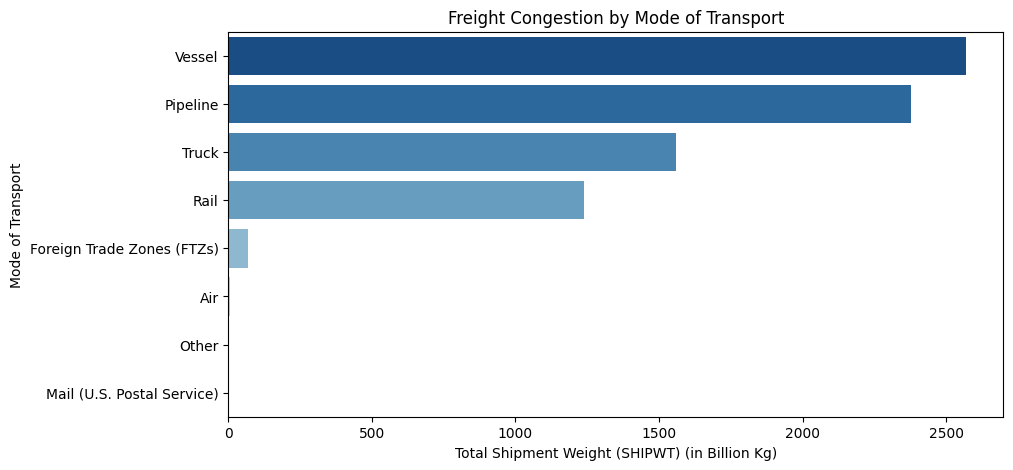

In [78]:
# Mode-Specific Congestion
mode_congestion = final_data.groupby('DISAGMOT')['SHIPWT'].sum().reset_index()
mode_congestion['SHIPWT'] = (mode_congestion['SHIPWT'] / 1e9).round(2)
mode_congestion = mode_congestion.sort_values(by = 'SHIPWT', ascending = False)

print('\nTransport Mode with Highest Congestion:')
print(mode_congestion)

plt.figure(figsize = (10, 5))
sns.barplot(x = 'SHIPWT', y = 'DISAGMOT', hue = 'DISAGMOT', data = mode_congestion, palette = 'Blues_r')
plt.xlabel('Total Shipment Weight (SHIPWT) (in Billion Kg)')
plt.ylabel('Mode of Transport')
plt.title('Freight Congestion by Mode of Transport')
plt.show()

- In overall US freight flow, **Vessel** has extremely high **SHIPWT** indicating a potential congestion and capacity issues.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

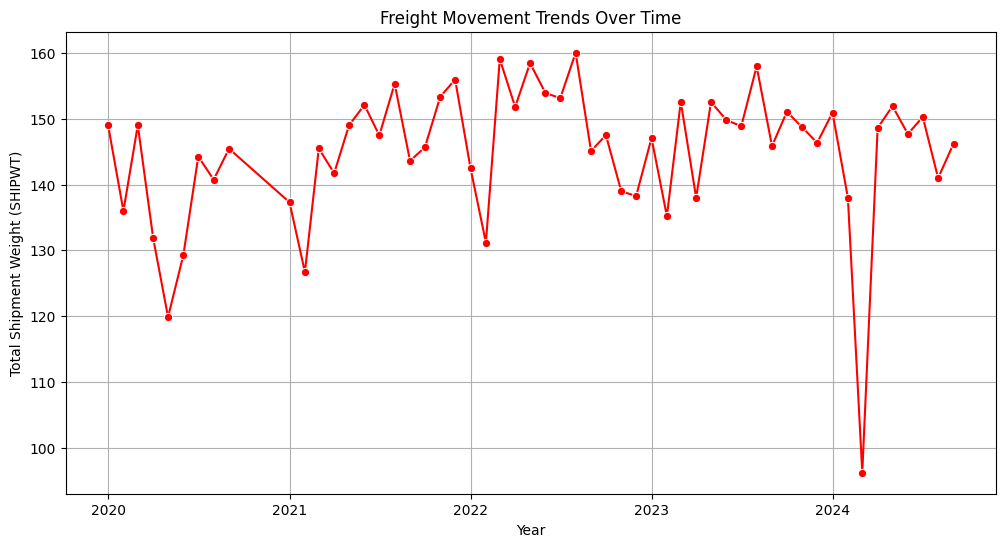

In [79]:
# Peak Congestion Periods
monthly_congestion = final_data.groupby('DATE')['SHIPWT'].sum().reset_index()
monthly_congestion['SHIPWT'] = (monthly_congestion['SHIPWT'] / 1e9).round(2)

plt.figure(figsize = (12, 6))
sns.lineplot(x = 'DATE', y = 'SHIPWT', data = monthly_congestion, marker = 'o', color = 'red')
plt.xlabel('Year')
plt.ylabel('Total Shipment Weight (SHIPWT)')
plt.title('Freight Movement Trends Over Time')
plt.grid(True)
plt.show()

- There is a noticeable **ups and downs** in the chart above indicating seasonal or operational variations in freight movement.

In [80]:
# Identify the Busiest Ports 
port_congestion = final_data.groupby('DEPE')['SHIPWT'].sum().reset_index()
port_congestion['SHIPWT'] = (port_congestion['SHIPWT'] / 1e9).round(2)
port_congestion = port_congestion.sort_values(by = 'SHIPWT', ascending = False)

print('\nTop 10 Busiest Ports by SHIPWT (in Billion Kg):')
print(port_congestion.head(10))


Top 10 Busiest Ports by SHIPWT (in Billion Kg):
     DEPE  SHIPWT
221  39XX  809.26
237  5301  296.80
68   2304  273.50
64   21XX  246.75
202  3802  245.59
63   20XX  241.72
238  53XX  181.27
201  3801  173.91
194  3501  152.43
196  3604  148.41


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

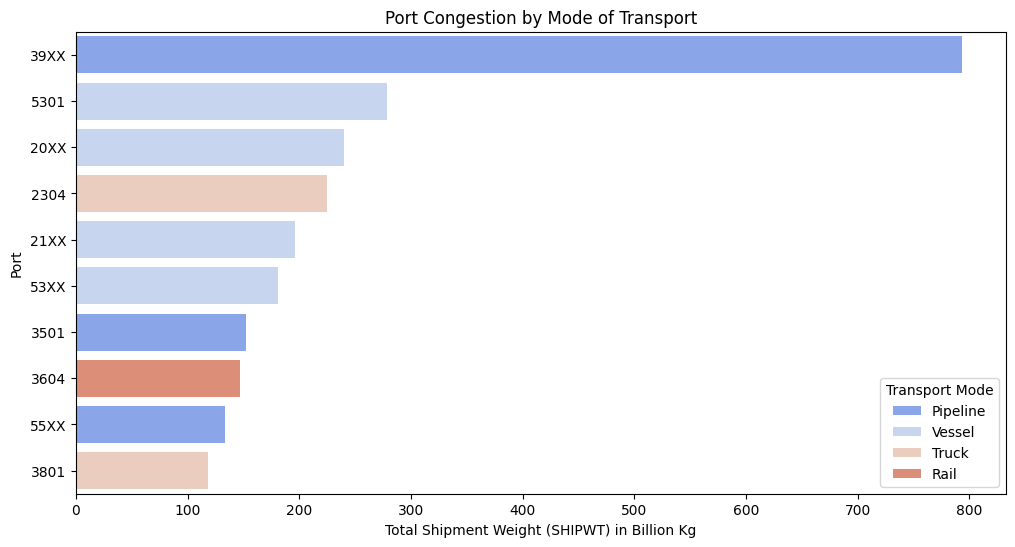

In [81]:
# Port Congestion by Transport Mode
port_mode_congestion = final_data.groupby(['DEPE', 'DISAGMOT'])['SHIPWT'].sum().reset_index()
port_mode_congestion['SHIPWT'] = (port_mode_congestion['SHIPWT'] / 1e9).round(2)
port_mode_congestion = port_mode_congestion.sort_values(by = 'SHIPWT', ascending = False).head(10)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'SHIPWT', y = 'DEPE', hue = 'DISAGMOT', data = port_mode_congestion, palette = 'coolwarm')
plt.xlabel('Total Shipment Weight (SHIPWT) in Billion Kg')
plt.ylabel('Port')
plt.title('Port Congestion by Mode of Transport')
plt.legend(title = 'Transport Mode')
plt.show()

- ### Under Utilizated Routes


Least Utilized Routes (Bottom 10):
Route
Hawaii → Mexico                   23.62
Montana → Mexico                  90.23
Vermont → Mexico                  90.56
New Hampshire → Mexico           140.26
South Dakota → Mexico            156.58
North Dakota → Mexico            169.01
District of Columbia → Mexico    173.37
Maine → Mexico                   312.10
Wyoming → Mexico                 386.05
Alaska → Mexico                  429.78
Name: SHIPWT, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

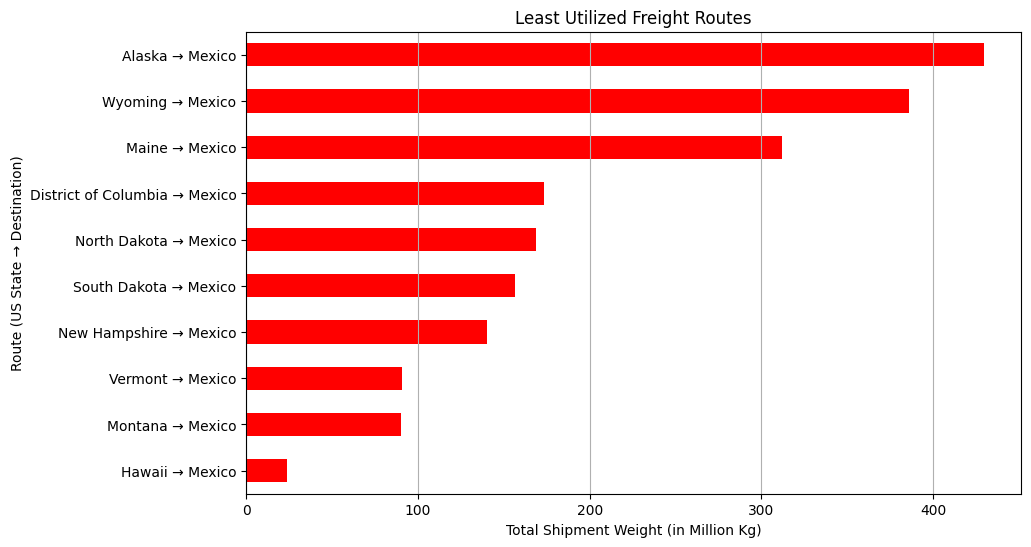

In [82]:
# Filter out records with zero shipment weight
df = final_data[final_data['SHIPWT'] > 0].copy()
df['SHIPWT'] = (df['SHIPWT'] / 1e6).round(2)

# Route analysis
if 'USASTATE' in df.columns and 'COUNTRY' in df.columns:
    df['Route'] = df['USASTATE'] + " → " + df['COUNTRY']
    route_utilization = df.groupby('Route')['SHIPWT'].sum().sort_values()

    print('\nLeast Utilized Routes (Bottom 10):')
    print(route_utilization.head(10))

    route_utilization.head(10).plot(kind = 'barh', color = 'red', figsize = (10, 6))
    plt.title('Least Utilized Freight Routes')
    plt.xlabel('Total Shipment Weight (in Million Kg)')
    plt.ylabel('Route (US State → Destination)')
    plt.grid(axis = 'x')
    plt.show()
else:
    print('No USASTATE or COUNTRY column found for route analysis.')

- ### Seasonal Decomposition

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

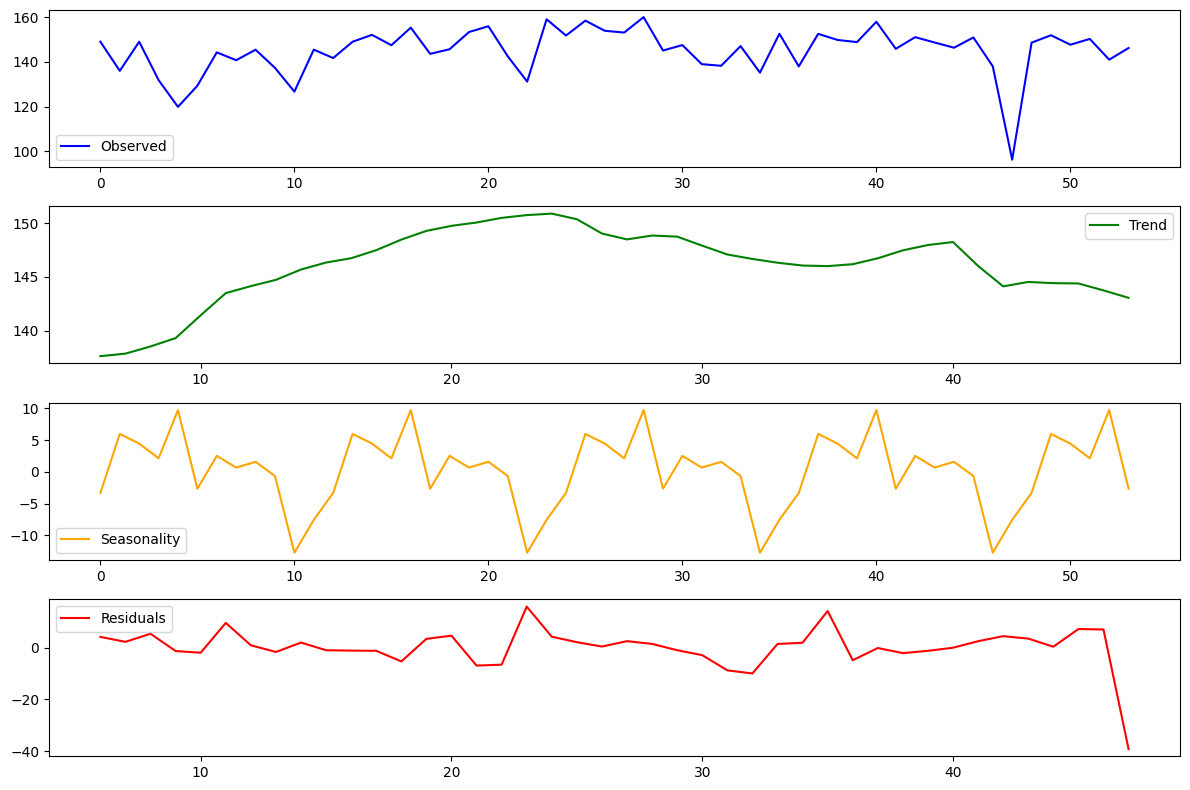

In [83]:
# Aggregate data by month for seasonal analysis
monthly_data = final_data.groupby('DATE')['SHIPWT'].sum().reset_index()
monthly_data['SHIPWT'] = (monthly_data['SHIPWT'] / 1e9).round(2)

# Perform Seasonal Decomposition
result = seasonal_decompose(monthly_data['SHIPWT'], model = 'additive', period = 12)

# Plot Seasonal Decomposition
plt.figure(figsize = (12, 8))
plt.subplot(411)
plt.plot(result.observed, label = 'Observed', color = 'blue')
plt.legend()
plt.subplot(412)
plt.plot(result.trend, label = 'Trend', color = 'green')
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal, label = 'Seasonality', color = 'orange')
plt.legend()
plt.subplot(414)
plt.plot(result.resid, label = 'Residuals', color = 'red')
plt.legend()
plt.tight_layout()
plt.show()

### Insights from Seasonal Decomposition Analysis

1. **Observed**  
   - This is the original data, showing the total shipped weight per month over time.
   - There is a general fluctuation, but a sharp dip appears toward the end as observed in *Total U.S. - North American Freight Flows Over Time* and *Freight Movement Trends Over Time*

2. **Trend**  
   - The long-term movement in the data smoothes out short-term variations.  
   - The trend initially increases, stabilizes, then slightly declines towards the end.  
   - This suggests a rise in shipments over time and a recent slowdown.

3. **Seasonality**  
   - There is a repeating pattern occurring at regular intervals 
   - A clear cyclic variations indicate a seasonal pattern in shipments.
     
4. **Residuals**  
   - This is what remains after removing trend and seasonality (random noise).  
   - Ideally, residuals should be randomly distributed around zero, meaning the model captures most patterns.  
   - However, some larger fluctuations in our dataset suggest irregular events affecting shipments.

Overall:
- Shipments follow a seasonal pattern, implying predictable variations in activity.
- The trend shows a general increase but a recent dip in 2024.
- Significant residuals in some places suggest external factors affecting shipments beyond trend and seasonality.

- ### Anomaly Detection in Residuals

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

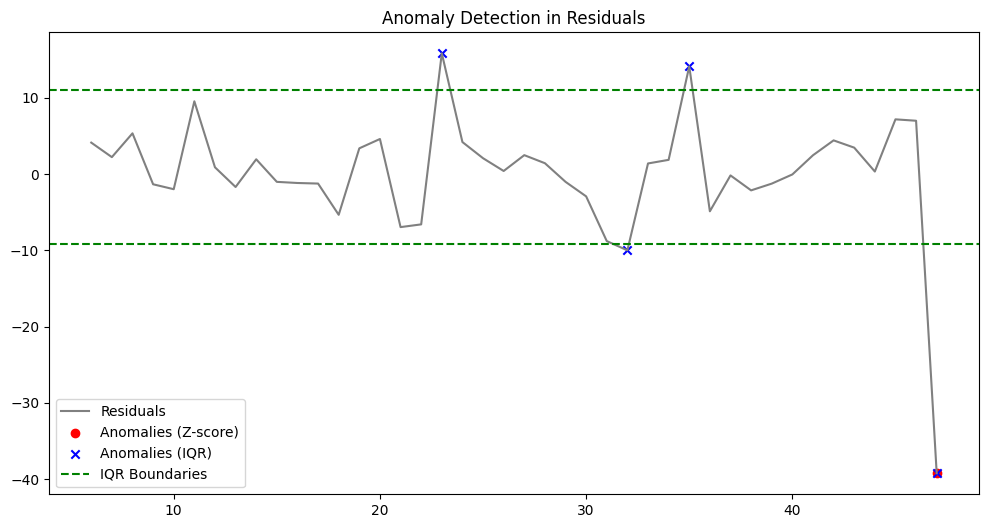

Anomalies detected using Z-score:
47   -39.236687
Name: resid, dtype: float64

Anomalies detected using IQR:
23    15.850813
32    -9.994812
35    14.138313
47   -39.236687
Name: resid, dtype: float64


In [84]:
# Extract residuals from seasonal decomposition
residuals = result.resid.dropna()

# Z-score Method (Threshold: 3 standard deviations)
z_scores = np.abs(zscore(residuals))
z_threshold = 3
anomalies_z = residuals[z_scores > z_threshold]

# IQR Method
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
anomalies_iqr = residuals[(residuals < lower_bound) | (residuals > upper_bound)]

# Plot residuals with anomalies
plt.figure(figsize=(12, 6))
plt.plot(residuals, label = 'Residuals', color = 'gray')
plt.scatter(anomalies_z.index, anomalies_z, color = 'red', label = 'Anomalies (Z-score)', marker = 'o')
plt.scatter(anomalies_iqr.index, anomalies_iqr, color = 'blue', label = 'Anomalies (IQR)', marker = 'x')
plt.axhline(y=upper_bound, color = 'green', linestyle = '--', label = 'IQR Boundaries')
plt.axhline(y=lower_bound, color = 'green', linestyle = '--')
plt.legend()
plt.title('Anomaly Detection in Residuals')
plt.show()

# Print detected anomalies
print("Anomalies detected using Z-score:")
print(anomalies_z)
print("\nAnomalies detected using IQR:")
print(anomalies_iqr)

### **Insights from the Anomaly Detection Results**  

#### **1. Anomalies Identified**
- **Z-score Method:**  
  - This detected one anomaly at index **47**, with a large negative residual (-39.24). This suggests a significant deviation from expected trends.  

- **IQR Method:**  
  - This detected anomalies at indices **23, 32, 35, and 47**. These values exceed the interquartile range, meaning they are extreme compared to typical variations.

#### **2. Visualization Insights**
- The **gray line** represents the residuals after trend and seasonality removal.  
- The **green dashed lines** mark the IQR boundaries, beyond which points are considered outliers.  
- The **red dot at index 47** (Z-score method) indicates a major unexpected drop.  
- The **blue crosses** (IQR method) indicate anomalies, capturing both extreme highs and lows.  

#### **3. Possible Causes**
- **At index 47**, a significant drop suggests an unusual event, this could be a supply chain disruption, economic downturn, or trade policy.  
- **At indices 23, 32, and 35**, spikes may indicate periods of unexpectedly high shipments, possibly due to seasonal demand surges, promotions, or bulk orders.

---